In [1]:
library("Seurat")
#remotes::install_github("mojaveazure/seurat-disk")
library("SeuratDisk")
#install.packages("ggplot2")
library(ggplot2)
#install.packages("remotes")
#remotes::install_github("chris-mcginnis-ucsf/DoubletFinder", force=TRUE)
library(DoubletFinder)
library(dplyr)
library(tidyverse)

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seura

09:53:39 UMAP embedding parameters a = 0.9922 b = 1.112

09:53:39 Read 3884 rows and found 20 numeric columns

09:53:39 Using Annoy for neighbor search, n_neighbors = 30

09:53:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:53:40 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271333d669d8

09:53:40 Searching Annoy index using 1 thread, search_k = 3000

09:53:41 Annoy recall = 100%

09:53:42 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:53:43 Initializing from normalized Laplacian + noise (using irlba)

09:53:43 Commencing optimization for 500 epochs, with 165392 positive edges

09:53:49 Optimization finished



AAACCTGAGCGTAGTG-1 AAACCTGCAAGCCATT-1 AAACCTGTCAACCATG-1 AAACCTGTCGGGAGTA-1 
                 1                  0                  2                  9 
AAACCTGTCTGTCTAT-1 AAACGGGAGAATGTGT-1 
                 3                  3 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

cluster_labels
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 
712 591 578 555 352 263 114 115  95 101 104  57  88  70  47  17  25 


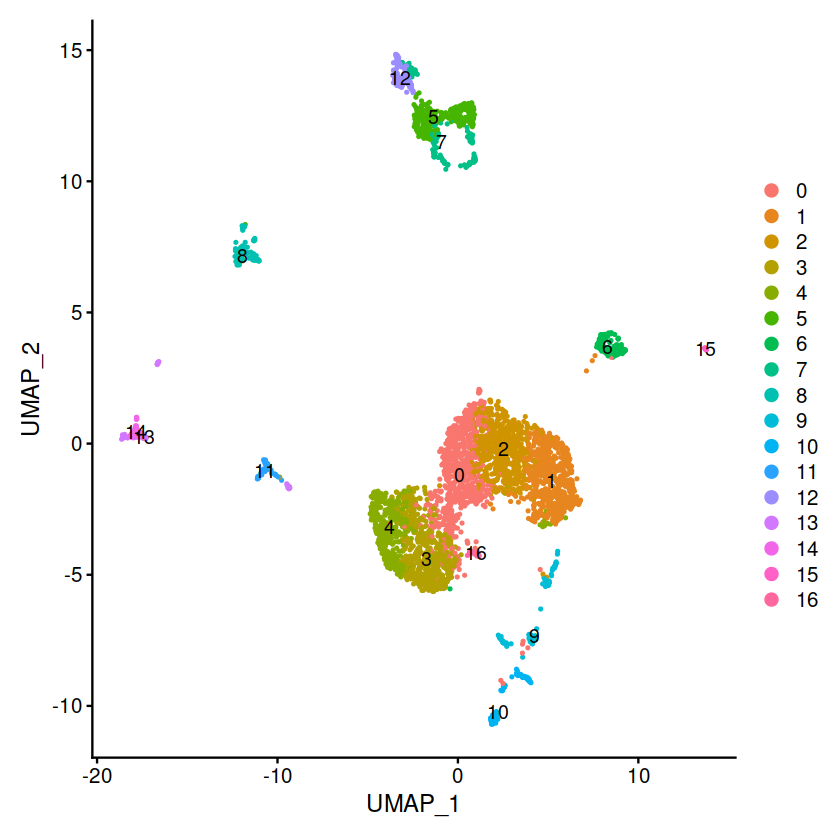

In [8]:
### For SCAF3163 ###
SCAF3163 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF3163/alternate/SCAF3163_cell_cycle_regress_difference_out.rds")
SCAF3163_new <- RunUMAP(SCAF3163, dims = 1:20)
DimPlot(SCAF3163_new, reduction = "umap", label = TRUE)
# Get the cluster labels
cluster_labels <- SCAF3163_new$seurat_clusters
head(cluster_labels)
# Count the number of cells in each cluster
cell_counts <- table(cluster_labels)
# Print the cell counts
print(cell_counts)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


png 
  2

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”
Regressing out CC.Difference

Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 3 features requested have not been scaled (running reduction without them): MLF1IP, FAM64A, HN1”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  TYMS, NUSAP1, HMGB2, RRM2, TOP2A, RRM1, SMC4, TMPO, UBE2C, CDK1 
	   PCNA, MKI67, CENPF, FEN1, NDC80, CLSPN, CKAP2, RAD51AP1, CCNE2, TPX2 
	   CKS2, ECT2, CDC6, MCM2, CCNB2, CKS1B, DTL, USP1, UHRF1, NASP 
Negative:  RANGAP1, TIPIN, G2E3, CDCA7, CTCF, CENPE, LBR, MCM6, GAS2L3, MCM5 
	   KIF20B, CASP8AP2, TACC3, AURKA, PSRC1, NCA

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4165
Number of edges: 152008

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8389
Number of communities: 17
Elapsed time: 0 seconds


10:15:13 UMAP embedding parameters a = 0.9922 b = 1.112

10:15:13 Read 4165 rows and found 20 numeric columns

10:15:13 Using Annoy for neighbor search, n_neighbors = 30

10:15:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:15:15 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271348be30a2

10:15:15 Searching Annoy index using 1 thread, search_k = 3000

10:15:16 Annoy recall = 100%

10:15:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:15:17 Initializing from normalized Laplacian + noise (using irlba)

10:15:18 Commencing optimization for 500 epochs, with 176622 positive edges

10:15:24 Optimization finished

Loading required package: fields

Loading required package: spam

Spam version 2.9-1 (

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR



NULL
[1] "Creating 1388 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,S.Score,G2M.Score,Phase,old.ident,CC.Difference,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.01_281,DF.classifications_0.25_0.01_281
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>
AAACCTGAGCGTAGTG-1,SCLC,5191,2420,3.37121942,0.0007310139,0.121513035,G2M,SCLC,-0.120782021,1,1,0.12500000,Singlet
AAACCTGAGCGTGAAC-1,SCLC,1234,724,3.48460292,-0.1001472633,0.041424437,G2M,SCLC,-0.141571700,15,15,0.30357143,Doublet
AAACCTGCAAGCCATT-1,SCLC,3399,1720,3.58929097,-0.2308804108,-0.174718388,G1,SCLC,-0.056162023,0,0,0.16071429,Singlet
AAACCTGGTCGGCACT-1,SCLC,7160,2427,0.83798883,-0.2501822531,-0.388665370,G1,SCLC,0.138483117,0,0,0.33928571,Doublet
AAACCTGTCAACCATG-1,SCLC,2710,1579,4.39114391,-0.1353276477,-0.162536215,G1,SCLC,0.027208567,2,2,0.01785714,Singlet
AAACCTGTCGGGAGTA-1,SCLC,567,217,4.05643739,-0.0497389961,-0.126676835,G1,SCLC,0.076937838,9,9,0.00000000,Singlet
AAACCTGTCTGTCTAT-1,SCLC,2170,1180,1.05990783,0.0840903970,-0.112130007,S,SCLC,0.196220404,3,3,0.08928571,Singlet
AAACGGGAGAATGTGT-1,SCLC,1238,824,0.08077544,-0.0988309998,-0.233477061,G1,SCLC,0.134646061,3,3,0.01785714,Singlet
AAACGGGAGATACACA-1,SCLC,4119,1877,3.20466133,0.0067383124,-0.324331790,S,SCLC,0.331070103,2,2,0.07142857,Singlet


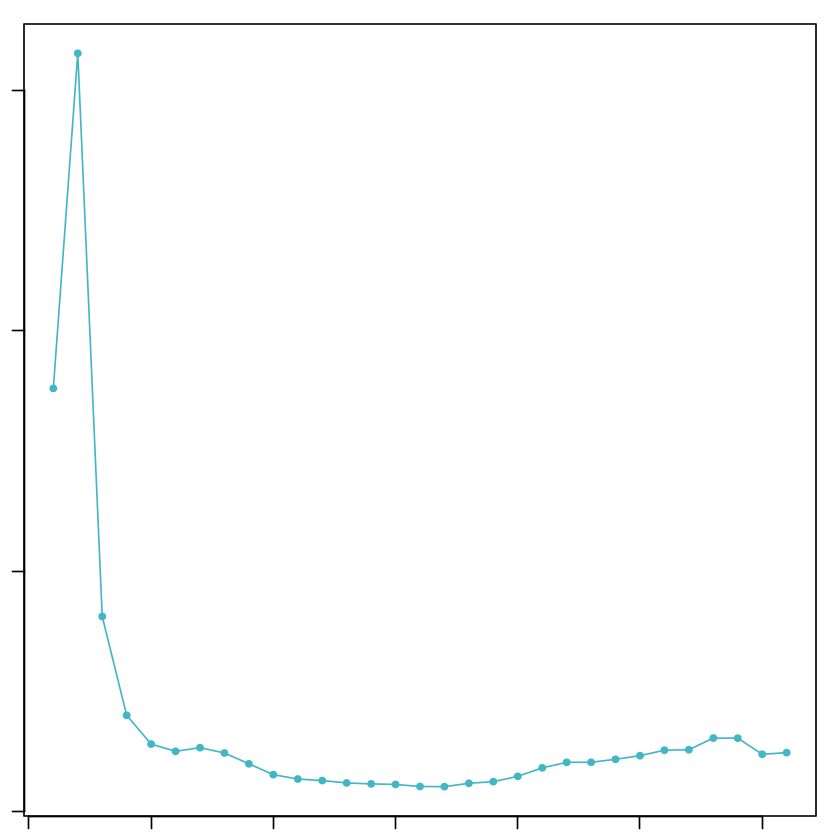

In [9]:
## Step 1 . Read a scRNA file 
dat <- Read10X_h5("/data/kumarr9/scRNA/SCAF3163_83-48-12-1_filtered_feature_bc_matrix.h5")

## step 2 . creating seurat object with with desired cell and gene parameters and also name the project
dat_seurat_obj <- CreateSeuratObject(counts = dat, min.cells = 3, min.features = 200, project = 'SCLC')

## step 3 . Identifying mitochindrial contamination-- and adding it to seurat object -- use MT when human and mt when mouse
dat_seurat_obj[["percent.mt"]] <- PercentageFeatureSet(dat_seurat_obj, pattern = "^MT-")
#View(dat_seurat_obj@meta.data) ## to visualize the data to see mitochondrial cells contamination

## step 4. plotting the mitochondrial contamination or data distribution
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/data_features.jpg", width = 3000, height = 2000, res=300)
#VlnPlot(dat_seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, col = "#FF7F50")
#dev.off()

## step 5. viewing data distribution before mitochondrial contamination removal
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/data_distribution.jpg", width = 3000, height = 2000, res=300)
# plot1 <- FeatureScatter(dat_seurat_obj, feature1 = "nCount_RNA", feature2 = "percent.mt") + geom_smooth(method = "lm")
# plot2 <- FeatureScatter(dat_seurat_obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth(method = "lm")
# SCAF3163_features <- plot1 + plot2
# SCAF3163_features
# dev.off()

## step 6. Removing low quality cells and mitochondrial contamination
dat_seurat_obj_filtered <- subset(dat_seurat_obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

### just to see what number of cells left after feature selection 
#dat_seurat_obj
#dat_seurat_obj_filtered

## step 7. plots the results after filtering or filtered features
# png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/data_filtered_features.jpg", width = 3000, height = 2000, res=300)
# VlnPlot(dat_seurat_obj_filtered, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, col = "#FF7F50")
# dev.off()

# png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/data_distribution_filtered_features.jpg", width = 3000, height = 2000, res=300)
# plot1 <- FeatureScatter(dat_seurat_obj_filtered, feature1 = "nCount_RNA", feature2 = "percent.mt") + geom_smooth(method = "lm")
# plot2 <- FeatureScatter(dat_seurat_obj_filtered, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth(method = "lm")
# SCAF3163_features_filtered <- plot1 + plot2
# SCAF3163_features_filtered
# dev.off()

## step 8. Normalization of the data 
dat_seurat_obj_filtered <- NormalizeData(dat_seurat_obj_filtered)

## step 9. Identifying highly variable features from the normalized data 
## We next calculate a subset of features that exhibit high cell-to-cell variation in the dataset (i.e, they are highly expressed in some cells, and lowly expressed in others). 
## focusing on these genes in downstream analysis helps to highlight biological signal in single-cell datasets.
dat_seurat_obj_filtered <- FindVariableFeatures(dat_seurat_obj_filtered, selection.method = "vst")
# Identify the 10 most highly variable genes  (change to to your desired number of genes)
top10 <- head(VariableFeatures(dat_seurat_obj_filtered), 10)

# plot variable features with and without labels
png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/most_variable.jpg", width = 3000, height = 2000, res=300)
plot1 <- VariableFeaturePlot(dat_seurat_obj_filtered)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
SCAF3163_filterd_variable <- plot1 + plot2
SCAF3163_filterd_variable
dev.off()

## step 10. scale the data, Regression should be done during scaling of the data 
#(Note - here, we can also, remove unwanted source of vaiation like mitochondrial cell or cell cycle etc., see vignettes for more details)
# Shifts the expression of each gene, so that the mean expression across cells is 0
#Scales the expression of each gene, so that the variance across cells is 1
#This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate
#The results of this are stored in pbmc[["RNA"]]@scale.data
#############################################
### Parth ask to assign cell cycle score ####
# A list of cell cycle markers, from Tirosh et al, 2015, is loaded with Seurat.  We can
# segregate this list into markers of G2/M phase and markers of S phase
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
dat_seurat_obj_filtered <- CellCycleScoring(dat_seurat_obj_filtered, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
### Regressing out cell cycle from the object ###
dat_seurat_obj_filtered$CC.Difference <- dat_seurat_obj_filtered$S.Score - dat_seurat_obj_filtered$G2M.Score
dat_seurat_obj_filtered <- ScaleData(dat_seurat_obj_filtered, vars.to.regress = "CC.Difference", features = rownames(dat_seurat_obj_filtered))
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/difference_regressed_cell_cyle_SCAF2221.jpg", width = 3000, height = 2000, res=300)
dat_seurat_obj_filtered <- RunPCA(dat_seurat_obj_filtered, features = c(s.genes, g2m.genes))
#DimPlot(dat_seurat_obj_filtered)
#dev.off()

## step 11. Run PCA to educe the dimensionality
# By default, only the previously determined variable features are used as input, but can be defined using features argument if you wish to choose a different subset, like this pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
dat_seurat_obj_filtered <- RunPCA(object = dat_seurat_obj_filtered)
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/elbow.jpg", width = 3000, height = 2000, res=300)
#ElbowPlot(dat_seurat_obj_filtered)
#dev.off()
# Examine and visualize PCA results a few different ways
#print(dat_seurat_obj_filtered[["pca"]], dims = 1:5, nfeatures = 5)
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/PCA_plots_heterogeneity.jpg", width = 3000, height = 2000, res=300)
#DimPlot(dat_seurat_obj_filtered, reduction = "pca")
#dev.off()

## step 12. clusters the cells 
# Now using the elbow method we determine the neighbours, make the clusters of neighbour and then ran the UMAP to plot the same
dat_seurat_obj_filtered <- FindNeighbors(dat_seurat_obj_filtered, dims = 1:20) ## can change dims according to your needs
dat_seurat_obj_filtered <- FindClusters(dat_seurat_obj_filtered) ### here resolution (resolution = 0.5 or so) or like this wasy (resoultion=c(0.1, 0.3, 0.5, 0.7, 1)) can be added to see at what resolution your data fits ( resolution here means, how many clusters you want to see in your data, lower the number lower cluster anf higher the number higher clusters)
#View(dat_seurat_obj_filtered@meta.data)
# optional step (to set the granularity of the data, i mean the number of clusters to be shown in UMAP)
## seeing or setting identity of clusters  
## Idents function store the identity of cluster
#head(Idents(dat_seurat_obj_filtered), 5) 
#Idents(dat_seurat_obj_filtered)
# when want to set the identity 
#Idents(dat_seurat_obj_filtered) <- SCLC_snn_res_0.3 ## this will set the resolution at 0.3 and make the only number of clusters which are in 0.3 resolution

dat_seurat_obj_filtered <- RunUMAP(dat_seurat_obj_filtered, dims = 1:20)
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/UMAP.jpg", width = 3000, height = 2000, res=300)
#DimPlot(dat_seurat_obj_filtered, reduction = "umap", label = TRUE)
#dev.off()


## step 13. Doublet Finding
sweep.list_SCAF3163 <- paramSweep_v3(dat_seurat_obj_filtered, PCs =1:20, sct=FALSE)
sweep.stats_SCAF3163 <- summarizeSweep(sweep.list_SCAF3163, GT = FALSE)
bcmvn_SCAF3163 <- find.pK(sweep.stats_SCAF3163)

### plotting the results --- highest value in plot is your optimal pK
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/optimal_k.jpg", width = 3000, height = 2000, res=300)
#ggplot(bcmvn_SCAF3163, aes(pK, BCmetric, group=1))+
#geom_point()+
#geom_line()
#dev.off()


### storing the highest pk value to a pk variable
pK <- bcmvn_SCAF3163 %>%
      filter(BCmetric == max(BCmetric)) %>%
      select(pK)
pK <- as.numeric(as.character(pK[[1]]))


### Homotypic doublet proprotion estimation
annotations <- dat_seurat_obj_filtered@meta.data$seurat_clusters
homotypic.prop <- modelHomotypic(annotations)
nExp_poi <- round(0.076*nrow(dat_seurat_obj_filtered@meta.data))
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))


#### run Doubletfinder 
dat_seurat_obj_filtered <- doubletFinder_v3(dat_seurat_obj_filtered, PCs = 1:20, pN = 0.25, pK = pK, nExp = nExp_poi.adj, reuse.pANN = FALSE, sct = FALSE)
## Viewing data frame 
View(dat_seurat_obj_filtered@meta.data)#

In [10]:
# before plotting we need to see following items in our data
names(dat_seurat_obj_filtered@meta.data)
# from there we got the DF.classification, which we need for plot
# homotypic.prop
nExp_poi ## number of expected doublets
nExp_poi.adj ## number of actual doublets

[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "percent.mt"                      
 [5] "S.Score"                          "G2M.Score"                       
 [7] "Phase"                            "old.ident"                       
 [9] "CC.Difference"                    "RNA_snn_res.0.8"                 
[11] "seurat_clusters"                  "pANN_0.25_0.01_281"              
[13] "DF.classifications_0.25_0.01_281"

[1] 317

[1] 281

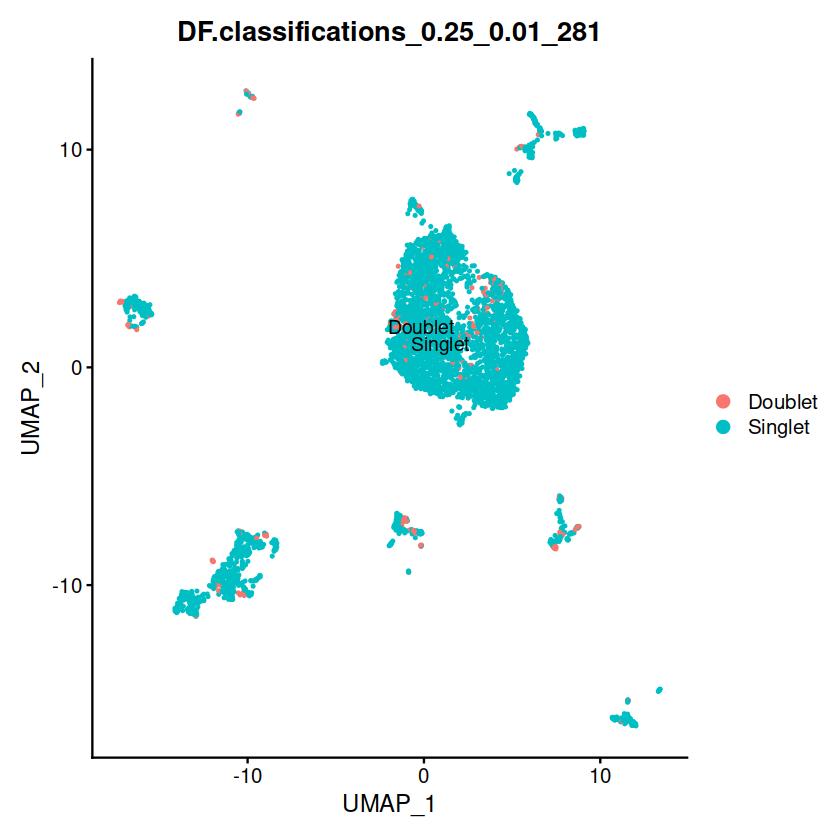

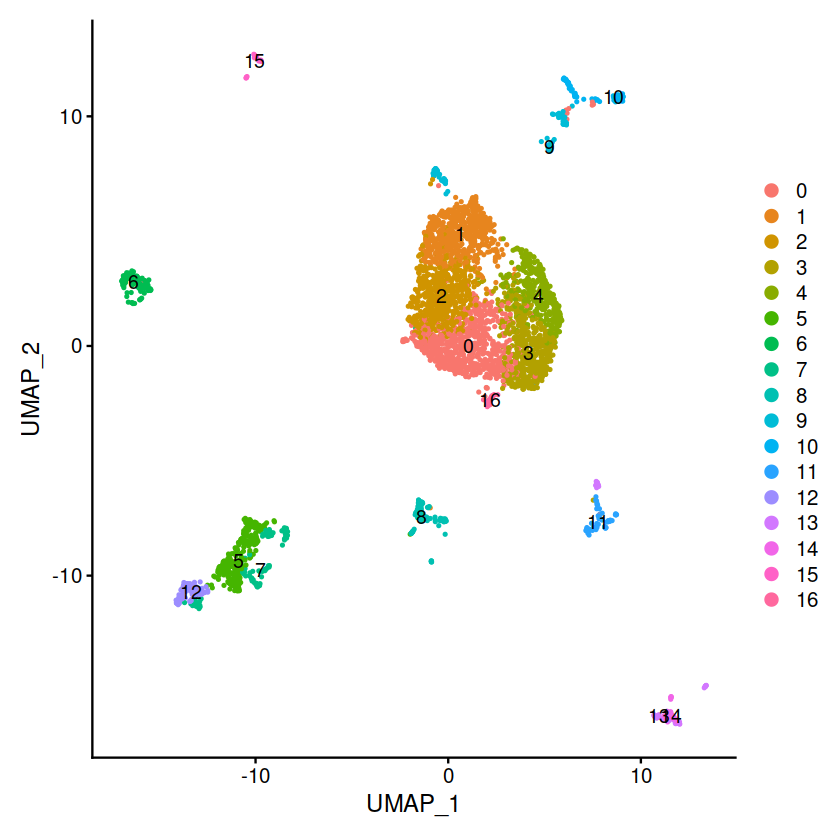

In [11]:
### visulaize the doublets 
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/doublets.jpg", width = 3000, height = 2000, res=300)
DimPlot(dat_seurat_obj_filtered, reduction = "umap", label = TRUE, group.by = "DF.classifications_0.25_0.01_281")
#dev.off()

## Step 13. Doublets removal
#since we have the name doublets in one of our meta data column of a "dat_seurat_obj_filtered@meta_data", this column has singlet and doublet information
#we can only select singlet by specifying values and so
#Link --- https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/seurat/seurat_01_qc.html
#data.filt = data.filt[, data.filt@meta.data[, DF.name] == "Singlet"]
data.filt = dat_seurat_obj_filtered[, dat_seurat_obj_filtered@meta.data[, "DF.classifications_0.25_0.01_281"] == "Singlet"]
#dim(data.filt)

### ploting the doublet removed dataset for PC & UMAP
#png("/data/kumarr9/scRNA/scRNA_results/SCAF3163/UMAP_doublets_removed.jpg", width = 3000, height = 2000, res=300)
#DimPlot(data.filt, reduction = "umap", label = TRUE, group.by = "DF.classifications_0.25_0.01_287")
#dev.off()


### plotting the doublet removed dataset with cluster info 
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221/alternate/without_doublets.jpg", width = 3000, height = 2000, res=300)
DimPlot(data.filt, reduction = "umap", label = TRUE)
#dev.off()

In [12]:
cluster_labelss <- data.filt$seurat_clusters
head(cluster_labelss)
# Count the number of cells in each cluster
cell_countss <- table(cluster_labels)
# Print the cell counts
print(cell_countss)

AAACCTGAGCGTAGTG-1 AAACCTGCAAGCCATT-1 AAACCTGTCAACCATG-1 AAACCTGTCGGGAGTA-1 
                 1                  0                  2                  9 
AAACCTGTCTGTCTAT-1 AAACGGGAGAATGTGT-1 
                 3                  3 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

cluster_labels
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 
712 591 578 555 352 263 114 115  95 101 104  57  88  70  47  17  25 


In [15]:
#### saving for each scRNA dataset ####
### For SCAF3163 ###
SCAF3163 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF3163/alternate/SCAF3163_cell_cycle_regress_difference_out.rds")
SCAF3163_new <- RunUMAP(SCAF3163, dims = 1:20)
#DimPlot(SCAF3163_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF3163_labels <- SCAF3163_new$seurat_clusters
# Count the number of cells in each cluster
SCAF3163_counts <- table(SCAF3163_labels)

10:33:30 UMAP embedding parameters a = 0.9922 b = 1.112

10:33:30 Read 3884 rows and found 20 numeric columns

10:33:30 Using Annoy for neighbor search, n_neighbors = 30

10:33:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:33:30 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file192713195264be

10:33:30 Searching Annoy index using 1 thread, search_k = 3000

10:33:32 Annoy recall = 100%

10:33:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:33:33 Initializing from normalized Laplacian + noise (using irlba)

10:33:33 Commencing optimization for 500 epochs, with 165392 positive edges

10:33:39 Optimization finished



SCAF3163_labels
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 
712 591 578 555 352 263 114 115  95 101 104  57  88  70  47  17  25 


In [47]:
SCAF3163_df <- data.frame(SCAF3163_counts)
View(SCAF3163_df)

SCAF3163_labels,Freq
<fct>,<int>
0,712
1,591
2,578
3,555
4,352
5,263
6,114
7,115
8,95


In [16]:
### For SCAF2222 ###
SCAF2222 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2222/alternate/SCAF2222_cell_cycle_regress_difference_out.rds")
SCAF2222_new <- RunUMAP(SCAF2222, dims = 1:20)
#DimPlot(SCAF2222_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2222_labels <- SCAF2222_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2222_counts <- table(SCAF2222_labels)

10:34:54 UMAP embedding parameters a = 0.9922 b = 1.112

10:34:54 Read 477 rows and found 20 numeric columns

10:34:54 Using Annoy for neighbor search, n_neighbors = 30

10:34:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:34:54 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271354f8d757

10:34:54 Searching Annoy index using 1 thread, search_k = 3000

10:34:54 Annoy recall = 100%

10:34:55 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:34:56 Initializing from normalized Laplacian + noise (using irlba)

10:34:56 Commencing optimization for 500 epochs, with 17168 positive edges

10:34:57 Optimization finished



In [48]:
SCAF2222_df <- data.frame(SCAF2222_counts)
View(SCAF2222_df)

SCAF2222_labels,Freq
<fct>,<int>
0,117
1,113
2,81
3,53
4,45
5,36
6,32


In [18]:
### For SCAF2221 ###
SCAF2221 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2221_increased_resolution/alternate/SCAF2221_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2221_new <- RunUMAP(SCAF2221, dims = 1:20)
#DimPlot(SCAF2221_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2221_labels <- SCAF2221_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2221_counts <- table(SCAF2221_labels)

10:38:13 UMAP embedding parameters a = 0.9922 b = 1.112

10:38:13 Read 1938 rows and found 20 numeric columns

10:38:13 Using Annoy for neighbor search, n_neighbors = 30

10:38:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:38:13 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271337c9626a

10:38:13 Searching Annoy index using 1 thread, search_k = 3000

10:38:14 Annoy recall = 100%

10:38:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:38:15 Initializing from normalized Laplacian + noise (using irlba)

10:38:15 Commencing optimization for 500 epochs, with 76120 positive edges

10:38:18 Optimization finished



In [49]:
SCAF2221_df <- data.frame(SCAF2221_counts)
View(SCAF2221_df)

SCAF2221_labels,Freq
<fct>,<int>
0,324
1,210
2,179
3,183
4,158
5,131
6,101
7,93
8,104


In [19]:
### For SCAF2229 ###
SCAF2229 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2229/alternate/SCAF2229_cell_cycle_regress_difference_out.rds")
SCAF2229_new <- RunUMAP(SCAF2229, dims = 1:20)
#DimPlot(SCAF2229_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2229_labels <- SCAF2229_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2229_counts <- table(SCAF2229_labels)

10:39:15 UMAP embedding parameters a = 0.9922 b = 1.112

10:39:15 Read 1422 rows and found 20 numeric columns

10:39:15 Using Annoy for neighbor search, n_neighbors = 30

10:39:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:39:16 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271330a84274

10:39:16 Searching Annoy index using 1 thread, search_k = 3000

10:39:16 Annoy recall = 100%

10:39:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:39:17 Initializing from normalized Laplacian + noise (using irlba)

10:39:17 Commencing optimization for 500 epochs, with 57616 positive edges

10:39:20 Optimization finished



In [50]:
SCAF2229_df <- data.frame(SCAF2229_counts)
View(SCAF2229_df)

SCAF2229_labels,Freq
<fct>,<int>
0,425
1,242
2,187
3,189
4,137
5,52
6,52
7,55
8,41


In [20]:
### For RU1138 ###
RU1138 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1138/alternate/RU1138_cell_cycle_regress_difference_out.rds")
RU1138_new <- RunUMAP(RU1138, dims = 1:20)
#DimPlot(RU1138_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1138_labels <- RU1138_new$seurat_clusters
# Count the number of cells in each cluster
RU1138_counts <- table(RU1138_labels)

10:39:57 UMAP embedding parameters a = 0.9922 b = 1.112

10:39:57 Read 2861 rows and found 20 numeric columns

10:39:57 Using Annoy for neighbor search, n_neighbors = 30

10:39:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:39:57 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271325215ca8

10:39:57 Searching Annoy index using 1 thread, search_k = 3000

10:39:58 Annoy recall = 100%

10:39:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:40:00 Initializing from normalized Laplacian + noise (using irlba)

10:40:00 Commencing optimization for 500 epochs, with 118870 positive edges

10:40:04 Optimization finished



In [51]:
RU1138_df <- data.frame(RU1138_counts)
View(RU1138_df)

RU1138_labels,Freq
<fct>,<int>
0,631
1,402
2,424
3,318
4,249
5,219
6,114
7,110
8,105


In [21]:
### For RU426B ###
RU426B <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU426B/alternate/RU426B_cell_cycle_regress_difference_out_resolution_0.9.rds")
RU426B_new <- RunUMAP(RU426B, dims = 1:20)
#DimPlot(RU426B_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU426B_labels <- RU426B_new$seurat_clusters
# Count the number of cells in each cluster
RU426B_counts <- table(RU426B_labels)

10:42:31 UMAP embedding parameters a = 0.9922 b = 1.112

10:42:31 Read 852 rows and found 20 numeric columns

10:42:31 Using Annoy for neighbor search, n_neighbors = 30

10:42:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:42:32 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927137d843031

10:42:32 Searching Annoy index using 1 thread, search_k = 3000

10:42:32 Annoy recall = 100%

10:42:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:42:33 Initializing from normalized Laplacian + noise (using irlba)

10:42:33 Commencing optimization for 500 epochs, with 31138 positive edges

10:42:35 Optimization finished



In [52]:
RU426B_df <- data.frame(RU426B_counts)
View(RU426B_df)

RU426B_labels,Freq
<fct>,<int>
0,163
1,107
2,111
3,99
4,90
5,86
6,82
7,52
8,20


In [22]:
### For RU1144 ###
RU1144 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1144_increased_resolution/alternate/RU1144_cell_cycle_regress_difference_out_resolution_1.rds")
RU1144_new <- RunUMAP(RU1144, dims = 1:20)
#DimPlot(RU1144_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1144_labels <- RU1144_new$seurat_clusters
# Count the number of cells in each cluster
RU1144_counts <- table(RU1144_labels)

10:45:15 UMAP embedding parameters a = 0.9922 b = 1.112

10:45:15 Read 637 rows and found 20 numeric columns

10:45:15 Using Annoy for neighbor search, n_neighbors = 30

10:45:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:45:15 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927132f2e95e1

10:45:15 Searching Annoy index using 1 thread, search_k = 3000

10:45:16 Annoy recall = 100%

10:45:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:45:17 Initializing from normalized Laplacian + noise (using irlba)

10:45:17 Commencing optimization for 500 epochs, with 23954 positive edges

10:45:18 Optimization finished



In [53]:
RU1144_df <- data.frame(RU1144_counts)
View(RU1144_df)

RU1144_labels,Freq
<fct>,<int>
0,137
1,106
2,106
3,104
4,66
5,52
6,36
7,30


In [24]:
### For RU1065C ###
RU1065C <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1065C/alternate/RU1065C_cell_cycle_regress_difference_out.rds")
RU1065C_new <- RunUMAP(RU1065C, dims = 1:20)
#DimPlot(RU1065C_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1065C_labels <- RU1065C_new$seurat_clusters
# Count the number of cells in each cluster
RU1065C_counts <- table(RU1065C_labels)

10:46:58 UMAP embedding parameters a = 0.9922 b = 1.112

10:46:58 Read 3325 rows and found 20 numeric columns

10:46:58 Using Annoy for neighbor search, n_neighbors = 30

10:46:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:46:58 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271331b9ac4

10:46:58 Searching Annoy index using 1 thread, search_k = 3000

10:46:59 Annoy recall = 100%

10:47:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:47:01 Initializing from normalized Laplacian + noise (using irlba)

10:47:01 Commencing optimization for 500 epochs, with 143716 positive edges

10:47:06 Optimization finished



In [54]:
RU1065C_df <- data.frame(RU1065C_counts)
View(RU1065C_df)

RU1065C_labels,Freq
<fct>,<int>
0,627
1,567
2,553
3,414
4,376
5,198
6,181
7,117
8,98


In [26]:
### For RU1293A ###
RU1293A <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1293A/alternate/RU1293A_cell_cycle_regress_difference_out_resolution_1.rds")
RU1293A_new <- RunUMAP(RU1293A, dims = 1:20)
#DimPlot(RU1293A_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1293A_labels <- RU1293A_new$seurat_clusters
# Count the number of cells in each cluster
RU1293A_counts <- table(RU1293A_labels)

10:48:36 UMAP embedding parameters a = 0.9922 b = 1.112

10:48:36 Read 2616 rows and found 20 numeric columns

10:48:36 Using Annoy for neighbor search, n_neighbors = 30

10:48:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:48:36 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927134c3594e8

10:48:36 Searching Annoy index using 1 thread, search_k = 3000

10:48:37 Annoy recall = 100%

10:48:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:48:39 Initializing from normalized Laplacian + noise (using irlba)

10:48:39 Commencing optimization for 500 epochs, with 103634 positive edges

10:48:43 Optimization finished



In [55]:
RU1293A_df <- data.frame(RU1293A_counts)
View(RU1293A_df)

RU1293A_labels,Freq
<fct>,<int>
0,402
1,306
2,253
3,262
4,215
5,215
6,189
7,134
8,146


In [27]:
### For RU1311AT1 ###
RU1311AT1 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1311AT1/alternate/RU1311AT1_cell_cycle_regress_difference_out.rds")
RU1311AT1_new <- RunUMAP(RU1311AT1, dims = 1:20)
#DimPlot(RU1311AT1_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1311AT1_labels <- RU1311AT1_new$seurat_clusters
# Count the number of cells in each cluster
RU1311AT1_counts <- table(RU1311AT1_labels)

10:49:22 UMAP embedding parameters a = 0.9922 b = 1.112

10:49:22 Read 343 rows and found 20 numeric columns

10:49:22 Using Annoy for neighbor search, n_neighbors = 30

10:49:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:49:22 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file192713cee57bd

10:49:22 Searching Annoy index using 1 thread, search_k = 3000

10:49:23 Annoy recall = 100%

10:49:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:49:24 Initializing from normalized Laplacian + noise (using irlba)

10:49:24 Commencing optimization for 500 epochs, with 12604 positive edges

10:49:25 Optimization finished



In [56]:
RU1311AT1_df <- data.frame(RU1311AT1_counts)
View(RU1311AT1_df)

RU1311AT1_labels,Freq
<fct>,<int>
0,93
1,90
2,84
3,31
4,27
5,18


In [29]:
### For RU1108 ###
RU1108 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1108a/alternate/RU1108a_cell_cycle_regress_difference_out.rds")
RU1108_new <- RunUMAP(RU1108, dims = 1:20)
#DimPlot(RU1108_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1108_labels <- RU1108_new$seurat_clusters
# Count the number of cells in each cluster
RU1108_counts <- table(RU1108_labels)

10:51:12 UMAP embedding parameters a = 0.9922 b = 1.112

10:51:12 Read 484 rows and found 20 numeric columns

10:51:12 Using Annoy for neighbor search, n_neighbors = 30

10:51:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:51:12 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927136aac6e54

10:51:12 Searching Annoy index using 1 thread, search_k = 3000

10:51:12 Annoy recall = 100%

10:51:13 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:51:14 Initializing from normalized Laplacian + noise (using irlba)

10:51:14 Commencing optimization for 500 epochs, with 19622 positive edges

10:51:15 Optimization finished



In [57]:
RU1108_df <- data.frame(RU1108_counts)
View(RU1108_df)

RU1108_labels,Freq
<fct>,<int>
0,117
1,112
2,84
3,67
4,65
5,39


In [30]:
### For SCAF3065 ###
SCAF3065 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF3065/alternate/SCAF3065_cell_cycle_regress_difference_out.rds")
SCAF3065_new <- RunUMAP(SCAF3065, dims = 1:20)
#DimPlot(SCAF3065_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF3065_labels <- SCAF3065_new$seurat_clusters
# Count the number of cells in each cluster
SCAF3065_counts <- table(SCAF3065_labels)

10:51:56 UMAP embedding parameters a = 0.9922 b = 1.112

10:51:56 Read 998 rows and found 20 numeric columns

10:51:56 Using Annoy for neighbor search, n_neighbors = 30

10:51:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:51:56 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file19271330099474

10:51:56 Searching Annoy index using 1 thread, search_k = 3000

10:51:56 Annoy recall = 100%

10:51:57 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:51:57 Initializing from normalized Laplacian + noise (using irlba)

10:51:57 Commencing optimization for 500 epochs, with 39888 positive edges

10:51:59 Optimization finished



In [58]:
SCAF3065_df <- data.frame(SCAF3065_counts)
View(SCAF3065_df)

SCAF3065_labels,Freq
<fct>,<int>
0,231
1,138
2,127
3,123
4,111
5,114
6,52
7,41
8,34


In [31]:
### For SCAF2418 ###
SCAF2418 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2418/alternate/SCAF2418_cell_cycle_regress_difference_out.rds")
SCAF2418_new <- RunUMAP(SCAF2418, dims = 1:20)
#DimPlot(SCAF2418_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2418_labels <- SCAF2418_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2418_counts <- table(SCAF2418_labels)

10:52:34 UMAP embedding parameters a = 0.9922 b = 1.112

10:52:34 Read 745 rows and found 20 numeric columns

10:52:34 Using Annoy for neighbor search, n_neighbors = 30

10:52:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:52:34 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file192713647a449d

10:52:34 Searching Annoy index using 1 thread, search_k = 3000

10:52:34 Annoy recall = 100%

10:52:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:52:35 Initializing from normalized Laplacian + noise (using irlba)

10:52:35 Commencing optimization for 500 epochs, with 28912 positive edges

10:52:37 Optimization finished



In [59]:
SCAF2418_df <- data.frame(SCAF2418_counts)
View(SCAF2418_df)

SCAF2418_labels,Freq
<fct>,<int>
0,165
1,150
2,116
3,98
4,90
5,89
6,37


In [32]:
### For SCAF2497 ###
SCAF2497 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2497/alternate/SCAF2497_cell_cycle_regress_difference_out.rds")
SCAF2497_new <- RunUMAP(SCAF2497, dims = 1:20)
#DimPlot(SCAF2497_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2497_labels <- SCAF2497_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2497_counts <- table(SCAF2497_labels)

10:53:08 UMAP embedding parameters a = 0.9922 b = 1.112

10:53:08 Read 4379 rows and found 20 numeric columns

10:53:08 Using Annoy for neighbor search, n_neighbors = 30

10:53:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:53:08 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927133da6e688

10:53:08 Searching Annoy index using 1 thread, search_k = 3000

10:53:10 Annoy recall = 100%

10:53:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:53:11 Initializing from normalized Laplacian + noise (using irlba)

10:53:12 Commencing optimization for 500 epochs, with 188400 positive edges

10:53:18 Optimization finished



In [60]:
SCAF2497_df <- data.frame(SCAF2497_counts)
View(SCAF2497_df)

SCAF2497_labels,Freq
<fct>,<int>
0,747
1,509
2,627
3,564
4,568
5,374
6,312
7,242
8,111


In [33]:
### For RU1066 ###
RU1066 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1066/alternate/RU1066_cell_cycle_regress_difference_out.rds")
RU1066_new <- RunUMAP(RU1066, dims = 1:20)
#DimPlot(RU1066_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1066_labels <- RU1066_new$seurat_clusters
# Count the number of cells in each cluster
RU1066_counts <- table(RU1066_labels)

10:53:40 UMAP embedding parameters a = 0.9922 b = 1.112

10:53:40 Read 1441 rows and found 20 numeric columns

10:53:40 Using Annoy for neighbor search, n_neighbors = 30

10:53:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:53:40 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927133547a223

10:53:40 Searching Annoy index using 1 thread, search_k = 3000

10:53:40 Annoy recall = 100%

10:53:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:53:42 Initializing from normalized Laplacian + noise (using irlba)

10:53:42 Commencing optimization for 500 epochs, with 58372 positive edges

10:53:44 Optimization finished



In [61]:
RU1066_df <- data.frame(RU1066_counts)
View(RU1066_df)

RU1066_labels,Freq
<fct>,<int>
0,308
1,248
2,216
3,216
4,110
5,111
6,88
7,57
8,53


In [34]:
### For RU1181C ###
RU1181C <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1181C/alternate/RU1181C_cell_cycle_regress_difference_out.rds")
RU1181C_new <- RunUMAP(RU1181C, dims = 1:20)
DimPlot(RU1181C_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1181C_labels <- RU1181C_new$seurat_clusters
# Count the number of cells in each cluster
RU1181C_counts <- table(RU1181C_labels)

10:54:06 UMAP embedding parameters a = 0.9922 b = 1.112

10:54:06 Read 593 rows and found 20 numeric columns

10:54:06 Using Annoy for neighbor search, n_neighbors = 30

10:54:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:54:07 Writing NN index file to temp file /lscratch/4582676/RtmprUBi3H/file1927136dd5380a

10:54:07 Searching Annoy index using 1 thread, search_k = 3000

10:54:07 Annoy recall = 100%

10:54:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:54:08 Initializing from normalized Laplacian + noise (using irlba)

10:54:08 Commencing optimization for 500 epochs, with 22760 positive edges

10:54:09 Optimization finished



In [62]:
RU1181C_df <- data.frame(RU1181C_counts)
View(RU1181C_df)

RU1181C_labels,Freq
<fct>,<int>
0,122
1,102
2,92
3,77
4,72
5,56
6,32
7,30
8,10


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:24:44 UMAP embedding parameters a = 0.9922 b = 1.112

13:24:44 Read 935 rows and found 20 numeric columns

13:24:44 Using Annoy for neighbor search, n_neighbors = 30

13:24:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:24:45 Writing NN index file to temp file /lscratch/4868138/RtmpLlIBhI/file29304345880108

13:24:45 Searching Annoy index using 1 thread, search_k = 3000

13:24:45 Annoy recall = 100%

13:24:45 Commencing smooth kNN distance calibration using 1 thread
 with target

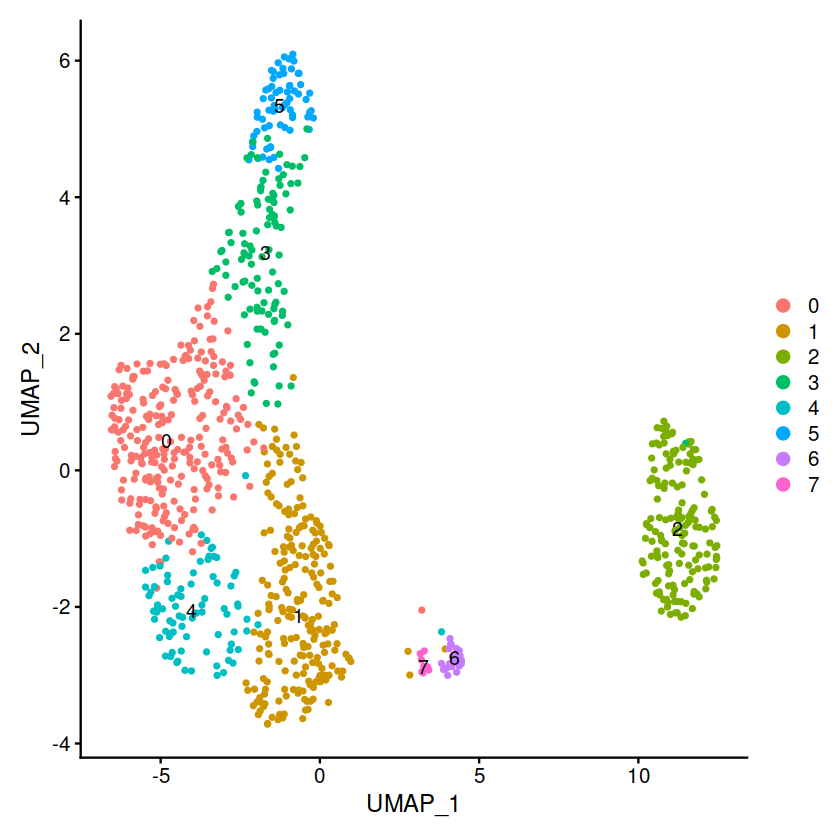

In [2]:
### For RU1195A ###
RU1195A <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1195A/alternate/RU1195A_cell_cycle_regress_difference_out.rds")
RU1195A_new <- RunUMAP(RU1195A, dims = 1:20)
DimPlot(RU1195A_new, reduction = "umap", label = TRUE)
# Get the cluster labels
RU1195A_labels <- RU1195A_new$seurat_clusters
# Count the number of cells in each cluster
RU1195A_counts <- table(RU1195A_labels)

In [63]:
RU1195A_df <- data.frame(RU1195A_counts)
View(RU1195A_df)

RU1195A_labels,Freq
<fct>,<int>
0,261
1,225
2,161
3,107
4,83
5,67
6,23
7,8


In [2]:
### Trying AUCell ##
# Link - https://www.youtube.com/watch?v=XtjZRZFzUVw
# Link - https://bioconductor.org/packages/devel/bioc/vignettes/AUCell/inst/doc/AUCell.html
#BiocManager::install("AUCell")
library(AUCell)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:46:28 UMAP embedding parameters a = 0.9922 b = 1.112

14:46:28 Read 935 rows and found 20 numeric columns

14:46:28 Using Annoy for neighbor search, n_neighbors = 30

14:46:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:46:28 Writing NN index file to temp file /lscratch/4652800/RtmpbWqjys/file7b80770d788b4

14:46:28 Searching Annoy index using 1 thread, search_k = 3000

14:46:28 Annoy recall = 100%

14:46:29 Commencing smooth kNN distance calibration using 1 thread
 with target 

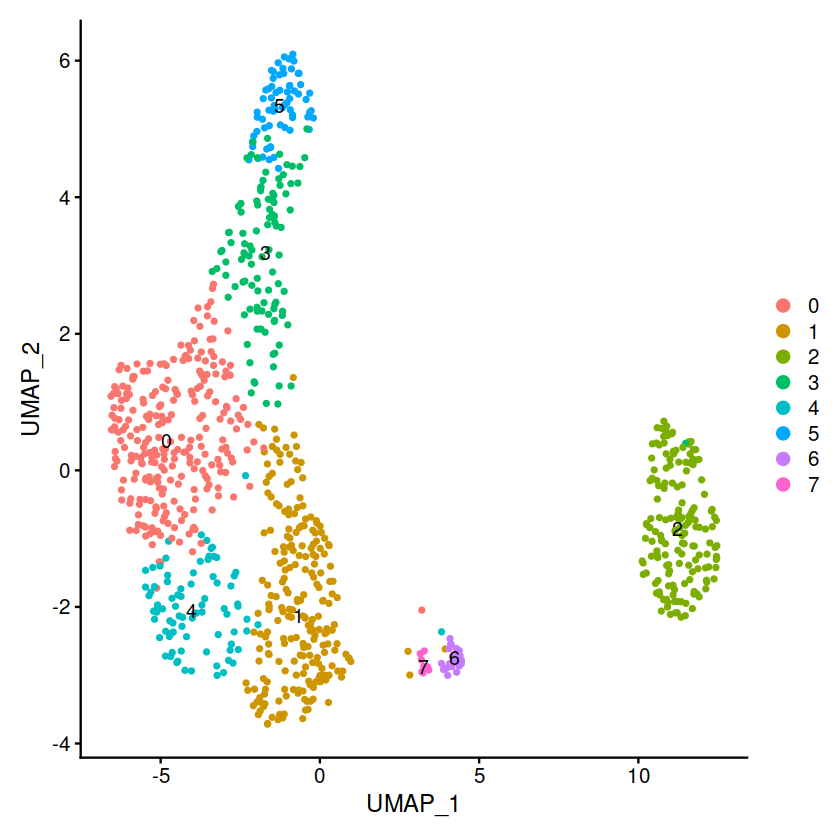

In [3]:
RU1195A <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1195A/alternate/RU1195A_cell_cycle_regress_difference_out.rds")
RU1195A_new <- RunUMAP(RU1195A, dims = 1:20)
DimPlot(RU1195A_new, reduction = "umap", label = TRUE)

In [8]:
RU1195A_new[[]] ## to see metadata structure of the dataframe 

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,S.Score,G2M.Score,Phase,old.ident,CC.Difference,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.05_62,DF.classifications_0.25_0.05_62,NE_genes_expression1,Non.NE_gene_expression1
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>
RU1195A_121887358105438,RU1195A,2359.7547,2291,0,0.0349883495,-0.010618768,S,RU1195A,0.045607117,1,1,0.09090909,Singlet,-0.109519557,0.2402620143
RU1195A_130538496277355,RU1195A,2186.7064,1435,0,0.1174133978,-0.051931039,S,RU1195A,0.169344437,0,0,0.01515152,Singlet,-0.026021290,0.1371174268
RU1195A_191097700772724,RU1195A,1983.4499,1775,0,0.2833561191,0.154131251,S,RU1195A,0.129224868,2,2,0.12121212,Singlet,0.616267929,-0.3121336755
RU1195A_122285058283958,RU1195A,2229.0199,1562,0,-0.0301148351,-0.010425910,G1,RU1195A,-0.019688925,5,5,0.03030303,Singlet,-0.091417873,-0.0672961085
RU1195A_199937951415213,RU1195A,2138.3460,1564,0,-0.0563956344,-0.072489587,G1,RU1195A,0.016093952,5,5,0.00000000,Singlet,-0.089196468,0.1086872984
RU1195A_129978437090604,RU1195A,971.0985,335,0,0.0733355975,0.176197839,G2M,RU1195A,-0.102862242,2,2,0.01515152,Singlet,0.092606930,-0.1547197899
RU1195A_196592946277726,RU1195A,2603.3542,2284,0,-0.0600512917,-0.088992442,G1,RU1195A,0.028941150,0,0,0.07575758,Singlet,-0.133814263,0.0318133414
RU1195A_196707150847395,RU1195A,2267.3378,1904,0,0.1424609226,-0.028947098,S,RU1195A,0.171408021,1,1,0.04545455,Singlet,-0.024897389,0.1026383511
RU1195A_129586368273654,RU1195A,1735.3997,1016,0,0.0277495031,-0.062030276,S,RU1195A,0.089779779,2,2,0.04545455,Singlet,0.288169610,-0.2427153803


In [4]:
## Get the count matrix of the seurat object
counts <- GetAssayData(object=RU1195A_new, slot = "counts")
#head(counts)

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



    min      1%      5%     10%     50%    100% 
 201.00  230.68  328.10  470.20 1706.00 2482.00 


Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


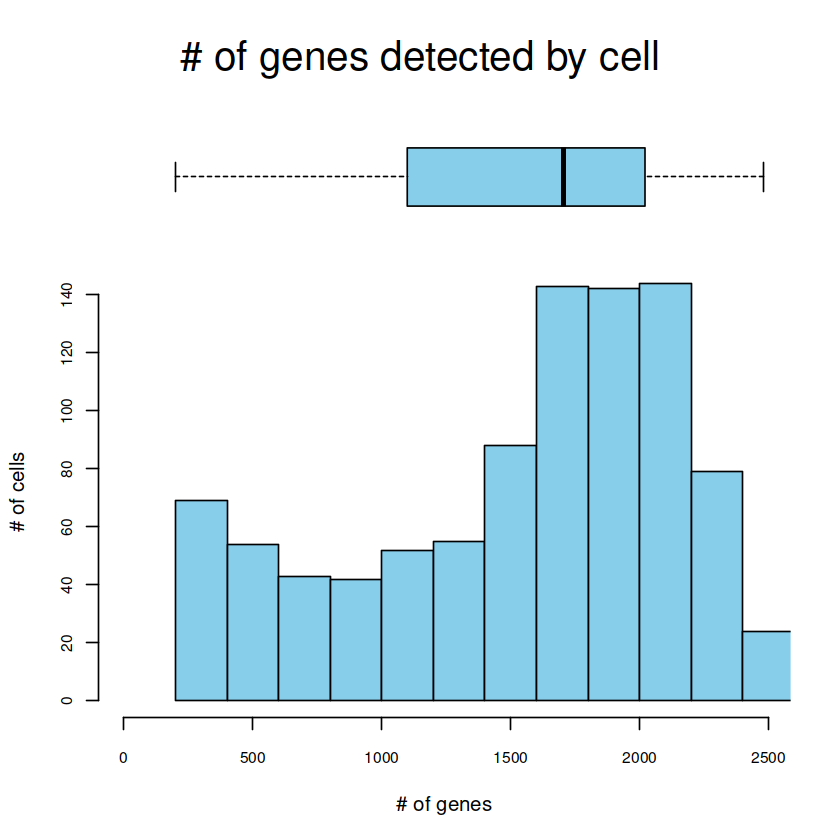

In [5]:
cell_ranking <- AUCell_buildRankings(counts)

In [8]:
### Now pass the gene list against which you want the score to be 
sclc_ne_genes <- c("ASCL1", "BEX1", "BSN", "CELF3", "CHGA", 
                   "CHGB","CRMP1", "TLCD3B", "INSM1", "KIF1A", 
                   "KIF5C", "MYT1", "RTN1", "RUNDC3A", "SCG3", 
                   "SEZ6", "SH3GL2", "SYN1", "SYP", "SYT1",               
                   "SYT4", "TAGLN3" ,"TFF3", "TMSB15A", "TMSB15B")
View(sclc_ne_genes)

[1] "ASCL1"   "BEX1"    "BSN"     "CELF3"   "CHGA"    "CHGB"    "CRMP1"  
 [8] "TLCD3B"  "INSM1"   "KIF1A"   "KIF5C"   "MYT1"    "RTN1"    "RUNDC3A"
[15] "SCG3"    "SEZ6"    "SH3GL2"  "SYN1"    "SYP"     "SYT1"    "SYT4"   
[22] "TAGLN3"  "TFF3"    "TMSB15A" "TMSB15B"

In [9]:
cell_auc <- AUCell_calcAUC(sclc_ne_genes, cell_ranking)

Genes in the gene sets NOT available in the dataset: 
	geneSet: 	1 (4% of 25)



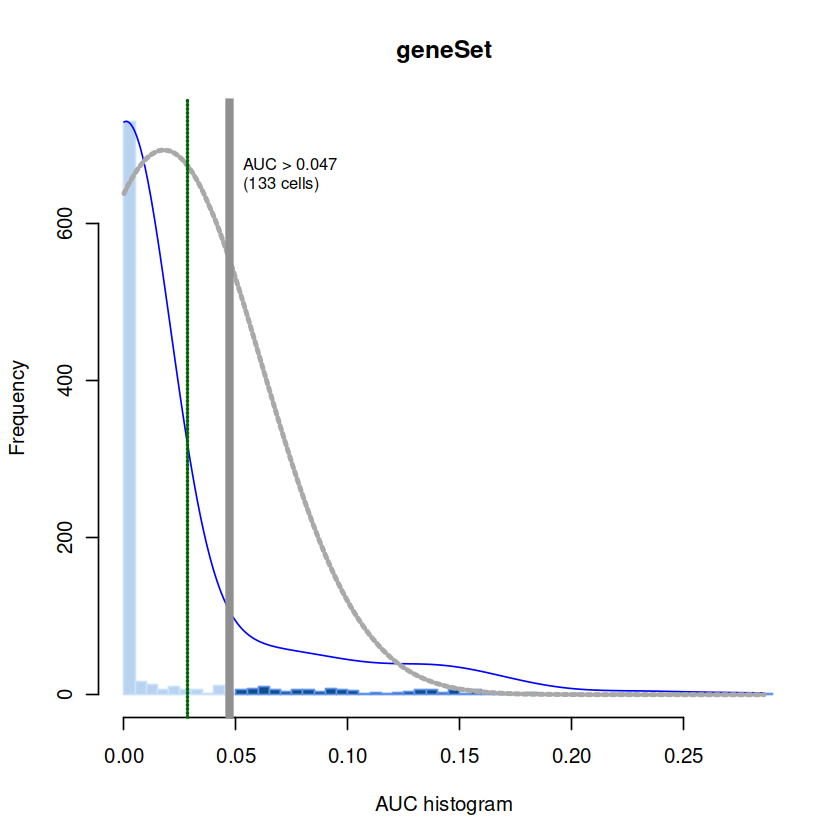

In [21]:
cells_assignment <- AUCell_exploreThresholds(cell_auc, plotHist=TRUE, assign=TRUE)
# keep in mind that the threshold selection in the current version is not exhaustive, 
#so we highly recommend to check the AUC histograms and manually select the threshold if needed.

In [12]:
## to see the assignemt of cells 
cells_assignment$geneSet$assignment

[1] "RU1195A_191097700772724" "RU1195A_129978437090604"
  [3] "RU1195A_129586368273654" "RU1195A_169717307132774"
  [5] "RU1195A_134994556274995" "RU1195A_231898650438956"
  [7] "RU1195A_130143762115308" "RU1195A_231684202715054"
  [9] "RU1195A_192101737970926" "RU1195A_200502471218997"
 [11] "RU1195A_169589815600933" "RU1195A_156048601857310"
 [13] "RU1195A_200897562109750" "RU1195A_196499918215526"
 [15] "RU1195A_196592958303012" "RU1195A_169727151491379"
 [17] "RU1195A_227915483993902" "RU1195A_236701751596837"
 [19] "RU1195A_197051868137901" "RU1195A_121338689178348"
 [21] "RU1195A_157680527697820" "RU1195A_160919066896733"
 [23] "RU1195A_169640012471595" "RU1195A_241054881111451"
 [25] "RU1195A_131095902968732" "RU1195A_156572874623206"
 [27] "RU1195A_231161156255004" "RU1195A_130049257717108"
 [29] "RU1195A_165729296084214" "RU1195A_122283703253870"
 [31] "RU1195A_129978391247580" "RU1195A_169079819922267"
 [33] "RU1195A_121735052716470" "RU1195A_130074671503262"
 [35] "RU1195A_231906467276517" "RU1195A_191215659562726"
 [37] "RU1195A_236297783790427" "RU1195A_135573418236211"
 [39] "RU1195A_240617702935963" "RU1195A_192718897625331"
 [41] "RU1195A_170875902379814" "RU1195A_230731493062580"
 [43] "RU1195A_121829792111915" "RU1195A_170328400710444"
 [45] "RU1195A_232252165188323" "RU1195A_120730011490531"
 [47] "RU1195A_157606842100124" "RU1195A_129586368204212"
 [49] "RU1195A_199877522045363" "RU1195A_239381838155101"
 [51] "RU1195A_166273844374245" "RU1195A_156034495539445"
 [53] "RU1195A_236108018207094" "RU1195A_235000972068588"
 [55] "RU1195A_230679148195174" "RU1195A_165371889280750"
 [57] "RU1195A_199877522570483" "RU1195A_135132217264884"
 [59] "RU1195A_157004353387308" "RU1195A_192317708716381"
 [61] "RU1195A_170182237408691" "RU1195A_135081931959028"
 [63] "RU1195A_239396858219805" "RU1195A_122488788048676"
 [65] "RU1195A_228058981874091" "RU1195A_165309478255398"
 [67] "RU1195A_230663207742771" "RU1195A_126227589064493"
 [69] "RU1195A_165808914951403" "RU1195A_157013868440355"
 [71] "RU1195A_192324048370100" "RU1195A_129661652331254"
 [73] "RU1195A_231849392565606" "RU1195A_227915456796917"
 [75] "RU1195A_191646632949533" "RU1195A_192815687723875"
 [77] "RU1195A_161408976272157" "RU1195A_231296428828580"
 [79] "RU1195A_191164540964084" "RU1195A_156034496321947"
 [81] "RU1195A_130546025486566" "RU1195A_227303182755699"
 [83] "RU1195A_134405321770741" "RU1195A_230748953898277"
 [85] "RU1195A_121405248490355" "RU1195A_135135331825501"
 [87] "RU1195A_135632493341597" "RU1195A_122444899052451"
 [89] "RU1195A_156049559632734" "RU1195A_192788020443894"
 [91] "RU1195A_226942290123494" "RU1195A_226821206555507"
 [93] "RU1195A_121886418591075" "RU1195A_122487983266588"
 [95] "RU1195A_235551820798251" "RU1195A_156031689639852"
 [97] "RU1195A_232303571166963" "RU1195A_134395523972318"
 [99] "RU1195A_157621498590957" "RU1195A_161317605725982"
[101] "RU1195A_165800209235299" "RU1195A_239543723714398"
[103] "RU1195A_170139199593691" "RU1195A_120730030847899"
[105] "RU1195A_205990602849070" "RU1195A_165738987088622"
[107] "RU1195A_134402878323549" "RU1195A_121731965446518"
[109] "RU1195A_192308969655733" "RU1195A_120786773560747"
[111] "RU1195A_199877535095595" "RU1195A_236770336655662"
[113] "RU1195A_121889774750004" "RU1195A_164698952747238"
[115] "RU1195A_131235501194477" "RU1195A_157491698030899"
[117] "RU1195A_125238538099051" "RU1195A_169012844481900"
[119] "RU1195A_156049540791198" "RU1195A_161952140512604"
[121] "RU1195A_230738055776108" "RU1195A_121955392342948"
[123] "RU1195A_156515966564270" "RU1195A_156051944717236"
[125] "RU1195A_126888208362845" "RU1195A_129663543924518"
[127] "RU1195A_130676055205748" "RU1195A_205913459412325"
[129] "RU1195A_200907387235115" "RU1195A_200992200772907"
[131] "RU1195A_134402925092076" "RU1195A_130213165514155"
[133] "RU1195A_227501959499124"

In [13]:
## From the plot it is clear that AUC of > 0.047 is good for our dataset
## Lets subset the cell_auc object for given threshold
new_cells <- names(which(getAUC(cell_auc)["geneSet", ]> 0.047))

In [14]:
## Now label those cells as NE and otherwise Non-NE in our seurat object 
RU1195A_new$Neuroendo <- ifelse(colnames(RU1195A)%in% new_cells, "Neuroendo", "Non-Neuroendo")

In [15]:
RU1195A_new[[]] ## to see the Neuro and Non-Neuro column added or not

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,S.Score,G2M.Score,Phase,old.ident,CC.Difference,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.05_62,DF.classifications_0.25_0.05_62,NE_genes_expression1,Non.NE_gene_expression1,Neuroendo
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
RU1195A_121887358105438,RU1195A,2359.7547,2291,0,0.0349883495,-0.010618768,S,RU1195A,0.045607117,1,1,0.09090909,Singlet,-0.109519557,0.2402620143,Non-Neuroendo
RU1195A_130538496277355,RU1195A,2186.7064,1435,0,0.1174133978,-0.051931039,S,RU1195A,0.169344437,0,0,0.01515152,Singlet,-0.026021290,0.1371174268,Non-Neuroendo
RU1195A_191097700772724,RU1195A,1983.4499,1775,0,0.2833561191,0.154131251,S,RU1195A,0.129224868,2,2,0.12121212,Singlet,0.616267929,-0.3121336755,Neuroendo
RU1195A_122285058283958,RU1195A,2229.0199,1562,0,-0.0301148351,-0.010425910,G1,RU1195A,-0.019688925,5,5,0.03030303,Singlet,-0.091417873,-0.0672961085,Non-Neuroendo
RU1195A_199937951415213,RU1195A,2138.3460,1564,0,-0.0563956344,-0.072489587,G1,RU1195A,0.016093952,5,5,0.00000000,Singlet,-0.089196468,0.1086872984,Non-Neuroendo
RU1195A_129978437090604,RU1195A,971.0985,335,0,0.0733355975,0.176197839,G2M,RU1195A,-0.102862242,2,2,0.01515152,Singlet,0.092606930,-0.1547197899,Neuroendo
RU1195A_196592946277726,RU1195A,2603.3542,2284,0,-0.0600512917,-0.088992442,G1,RU1195A,0.028941150,0,0,0.07575758,Singlet,-0.133814263,0.0318133414,Non-Neuroendo
RU1195A_196707150847395,RU1195A,2267.3378,1904,0,0.1424609226,-0.028947098,S,RU1195A,0.171408021,1,1,0.04545455,Singlet,-0.024897389,0.1026383511,Non-Neuroendo
RU1195A_129586368273654,RU1195A,1735.3997,1016,0,0.0277495031,-0.062030276,S,RU1195A,0.089779779,2,2,0.04545455,Singlet,0.288169610,-0.2427153803,Neuroendo


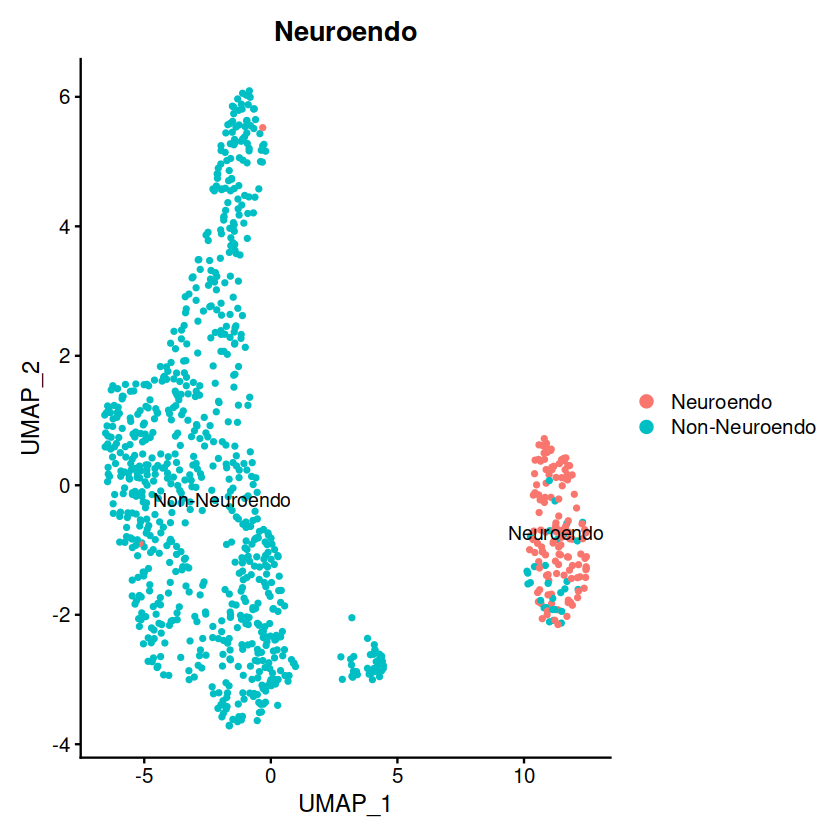

In [17]:
DimPlot(RU1195A_new, label=TRUE, group.by="Neuroendo")

In [ ]:
### September 12, 2023 
### For the rank 3 of PDX samples alone of ATAC matched scRNA, Parth assigned some task which are as follow
# Task for Rajesh
# NAPY downstream module scores for malignant cell clusters of selected scRNA samples
# Bar plots-  Malignant cells vs Non Malignant cells
# Bar plots- Non malignant cells composition
# Total number of cells profiled
# TCR heterogeneity/T cell diversity

## Sample number are this
# SCAF2326_81-72-75-4
# SCAF2497_81-67-84-9
# SCAF2229_81-68-62-3
# SCAF2225_81-82-68-1
# SCAF2037_TMSCLC-16
# SCAF2854_82-90-52-0

In [58]:
### Load few libraries
## Try plotting
library(ggplot2)
library(dplyr)
library(scales)
library("ggsci")
library("viridis")
library("ggpubr")


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [59]:
## Step 1, Read the .rds file
### For SCAF2326_81-72-75-4 ###
SCAF2326 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2326/alternate_cell_cycle_regress_out/SCAF2326_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2326_new <- RunUMAP(SCAF2326, dims = 1:20)
#DimPlot(SCAF2326_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2326_labels <- SCAF2326_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2326_counts <- table(SCAF2326_labels)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:01:40 UMAP embedding parameters a = 0.9922 b = 1.112

20:01:40 Read 2232 rows and found 20 numeric columns

20:01:40 Using Annoy for neighbor search, n_neighbors = 30

20:01:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:01:40 Writing NN index file to temp file /lscratch/8313375/RtmpJXV7pf/file324557546de8dd

20:01:40 Searching Annoy index using 1 thread, search_k = 3000

20:01:41 Annoy recall = 100%

20:01:41 Commencing smooth kNN distance calibration using 1 thread
 with targe

In [60]:
SCAF2326_counts
SCAF2326_df <- data.frame(SCAF2326_counts)
SCAF2326_df2 <- SCAF2326_df ## this dataframe is for malignant vs Non-malignant
## mark the cell/cluster as malignant vs non-malignant as send by Parth
SCAF2326_df2$SCAF2326_labels <- ifelse(SCAF2326_df2$SCAF2326_labels %in% c(0, 6, 8), "malignant", "non-malignant")
## Plot all the cells count
Fig1 <- ggplot(SCAF2326_df2, aes(x = SCAF2326_labels, y = Freq, fill = SCAF2326_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")
## When want to show the same in stacked proprtion
# ggplot(SCAF2326_df2, aes(x = "SCAF2326_labels", y = Freq, fill = SCAF2326_labels)) +
#   geom_bar(stat = "identity") +
#   labs(title = "Proportional Stacked Bar Plot of Malignant vs. Non-Malignant",
#        x = NULL,
#        y = "Frequency") +
#   scale_fill_igv() +
#   theme_minimal() +
#   theme(axis.text = element_blank(), 
#         axis.title = element_blank())

### Dr. thomas like the proprtion in separate bar plot
SCAF2326_df2_new <- SCAF2326_df %>%
  mutate(class = ifelse(as.vector(SCAF2326_labels) %in% c(0, 6, 8), "malignant", "non-malignant"))
dt2 <- SCAF2326_df2_new%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
Fig2 <- ggplot(dt2, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot")

## same plot but in stacked proprtion manner
# ggplot(dt2, aes(x = "", y = percent, fill = class))+
#   geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Malignant vs. Non-Malignant")
# png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF2326.jpg", width = 2500, height = 1000, res=300)
# ggarrange(Fig1, Fig2, 
#           labels = c("A", "B"),
#           ncol = 2, nrow = 1)
# dev.off()

SCAF2326_labels
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 
289 288 216 217 181 174 174 124 105  98  75  83  66  44  50  19  29 

In [124]:
### For other cell types, this time has to exclude the malignant cells and make bar plot for non-malignant one
non_malignant <- SCAF2326_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  T.NK.cell = c(1, 2, 3, 11, 12),
  B.cell = c(10, 13),
  M.M = c(4, 5, 9, 14, 16),
  CAF = 7,
  Endothelial = 15
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2326_labels %in% label_values] <- class_name
}

# Skip labels 0, 6, and 8
non_malignant <- non_malignant[!(non_malignant$SCAF2326_labels %in% c(0, 6, 8)), ]

# Print the updated dataframe
#print(non_malignant)

## group the updated dataframe for plot
dt3 <- non_malignant%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
## Plot the result
Fig3 <- ggplot(dt3, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Non-Malignant cells")

## same plot but with stacked proportional bar plot
# ggplot(dt3, aes(x = "", y = percent, fill = class))+
#   geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Non-Malignant cells")

## Plot all the combined plot
png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF2326.jpg", width = 4000, height = 1000, res=300)
ggarrange(Fig1, Fig2, Fig3,
           labels = c("A", "B", "C"),
           ncol = 3, nrow = 1)
dev.off()

In [125]:
non_malignant

,SCAF2326_labels,Freq,class
,<fct>,<int>,<chr>
2,1,288,T.NK.cell
3,2,216,T.NK.cell
4,3,217,T.NK.cell
5,4,181,M.M
6,5,174,M.M
8,7,124,CAF
10,9,98,M.M
11,10,75,B.cell
12,11,83,T.NK.cell


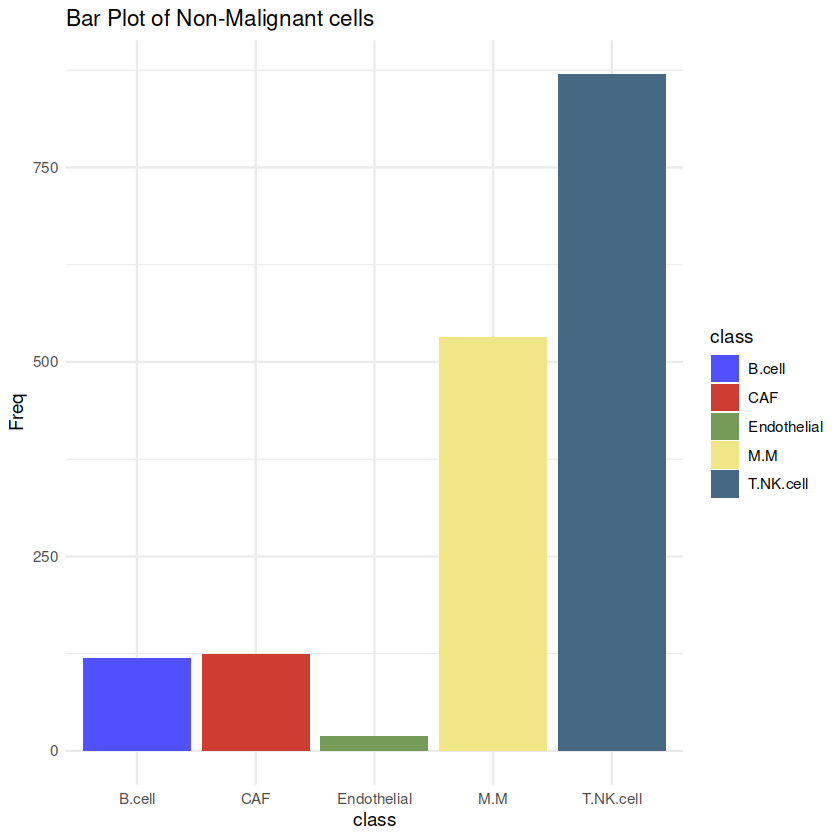

In [126]:
ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

In [159]:
## For sample SCAF2497
SCAF2497 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2497/alternate_cell_cycle_regress_out/SCAF2497_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2497_new <- RunUMAP(SCAF2497, dims = 1:20)
#DimPlot(SCAF2497_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2497_labels <- SCAF2497_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2497_counts <- table(SCAF2497_labels)

20:41:17 UMAP embedding parameters a = 0.9922 b = 1.112

20:41:17 Read 4366 rows and found 20 numeric columns

20:41:17 Using Annoy for neighbor search, n_neighbors = 30

20:41:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:41:18 Writing NN index file to temp file /lscratch/8034172/RtmpTf1lN7/file3faac829ff2d25

20:41:18 Searching Annoy index using 1 thread, search_k = 3000

20:41:19 Annoy recall = 100%

20:41:19 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:41:20 Initializing from normalized Laplacian + noise (using RSpectra)

20:41:20 Commencing optimization for 500 epochs, with 187896 positive edges

20:41:27 Optimization finished



In [160]:
SCAF2497_counts
SCAF2497_df <- data.frame(SCAF2497_counts)
SCAF2497_df2 <- SCAF2497_df ## this dataframe is for malignant vs Non-malignant
## mark the cell/cluster as malignant vs non-malignant as send by Parth
SCAF2497_df2$SCAF2497_labels <- ifelse(SCAF2497_df2$SCAF2497_labels %in% c(0,1,2,3,4,5,7,8,10,15,17,18), "malignant", "non-malignant")
## Plot all the cells count
Fig1 <- ggplot(SCAF2497_df2, aes(x = SCAF2497_labels, y = Freq, fill = SCAF2497_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")
### Dr. thomas like the proprtion in separate bar plot
SCAF2497_df2_new <- SCAF2497_df %>%
  mutate(class = ifelse(as.vector(SCAF2497_labels) %in% c(0,1,2,3,4,5,7,8,10,15,17,18), "malignant", "non-malignant"))
dt2 <- SCAF2497_df2_new%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
Fig2 <- ggplot(dt2, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot")

SCAF2497_labels
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
622 491 319 353 389 393 300 272 236 242 245 169  65  81  55   8  43  42  41 

In [161]:
### For other cell types, this time has to exclude the malignant cells and make bar plot for non-malignant one
non_malignant <- SCAF2497_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  T.NK.cell = 9,
  M.M = 16,
  CAF = c(6,13),
  Endothelial = 14,
  Non.malig.epith = c(11,12)  
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2497_labels %in% label_values] <- class_name
}

# Skip labels malignant one
non_malignant <- non_malignant[!(non_malignant$SCAF2497_labels %in% c(0,1,2,3,4,5,7,8,10,15,17,18)), ]

# Print the updated dataframe
#print(non_malignant)

## group the updated dataframe for plot
dt3 <- non_malignant%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
## Plot the result
Fig3 <- ggplot(dt3, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Non-Malignant cells")
## PLotting the result
png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF2497.jpg", width = 5000, height = 1000, res=300)
ggarrange(Fig1, Fig2, Fig3,
          labels = c("A", "B", "C"),
          ncol = 3, nrow = 1)
dev.off()

png 
  2

In [162]:
non_malignant

,SCAF2497_labels,Freq,class
,<fct>,<int>,<chr>
7,6,300,CAF
10,9,242,T.NK.cell
12,11,169,Non.malig.epith
13,12,65,Non.malig.epith
14,13,81,CAF
15,14,55,Endothelial
17,16,43,M.M


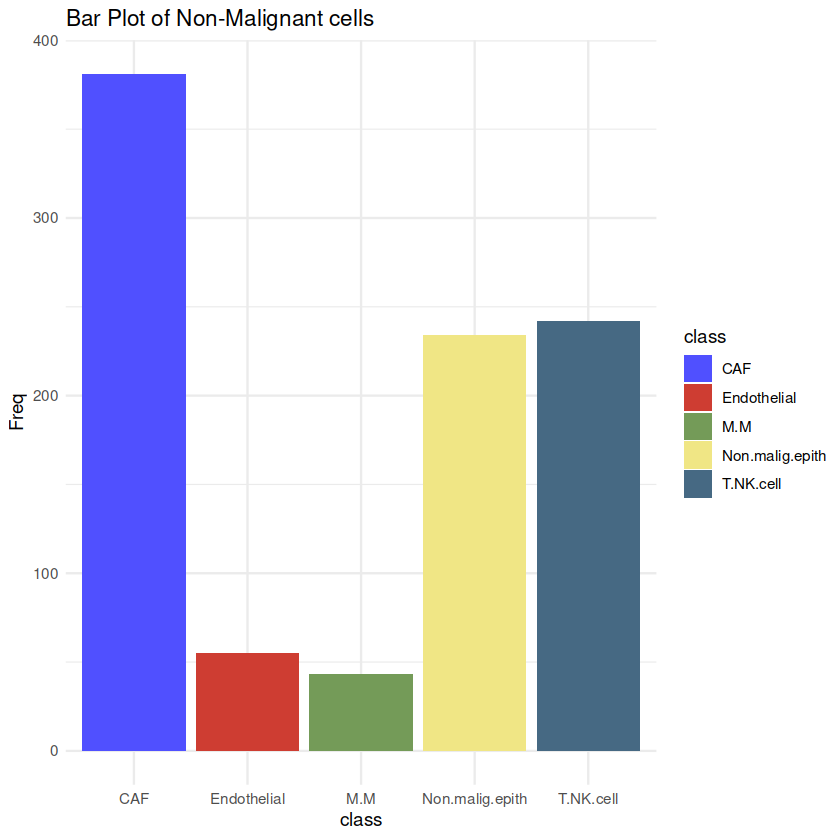

In [163]:
ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

In [164]:
## For sample SCAF2225
SCAF2225 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2225/alternate_cell_cycle_regress_out/SCAF2225_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2225_new <- RunUMAP(SCAF2225, dims = 1:20)
#DimPlot(SCAF2225_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2225_labels <- SCAF2225_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2225_counts <- table(SCAF2225_labels)

20:49:11 UMAP embedding parameters a = 0.9922 b = 1.112

20:49:11 Read 746 rows and found 20 numeric columns

20:49:11 Using Annoy for neighbor search, n_neighbors = 30

20:49:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:49:12 Writing NN index file to temp file /lscratch/8034172/RtmpTf1lN7/file3faac8a67db3d

20:49:12 Searching Annoy index using 1 thread, search_k = 3000

20:49:12 Annoy recall = 100%

20:49:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:49:13 Initializing from normalized Laplacian + noise (using RSpectra)

20:49:13 Commencing optimization for 500 epochs, with 28100 positive edges

20:49:14 Optimization finished



In [165]:
SCAF2225_counts
SCAF2225_df <- data.frame(SCAF2225_counts)
SCAF2225_df2 <- SCAF2225_df ## this dataframe is for malignant vs Non-malignant
## mark the cell/cluster as malignant vs non-malignant as send by Parth
SCAF2225_df2$SCAF2225_labels <- ifelse(SCAF2225_df2$SCAF2225_labels %in% c(4,5), "malignant", "non-malignant")
## Plot all the cells count
Fig1 <- ggplot(SCAF2225_df2, aes(x = SCAF2225_labels, y = Freq, fill = SCAF2225_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")
### Dr. thomas like the proprtion in separate bar plot
SCAF2225_df2_new <- SCAF2225_df %>%
  mutate(class = ifelse(as.vector(SCAF2225_labels) %in% c(4,5), "malignant", "non-malignant"))
dt2 <- SCAF2225_df2_new%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
Fig2 <- ggplot(dt2, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot")

SCAF2225_labels
  0   1   2   3   4   5   6   7   8 
188 139 122  67  65  60  47  39  19 

In [166]:
### For other cell types, this time has to exclude the malignant cells and make bar plot for non-malignant one
non_malignant <- SCAF2225_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  T.NK.cell = c(0,1,3,6,7),
  B.cell = 8, 
  M.M = 2 
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2225_labels %in% label_values] <- class_name
}

# Skip labels 0, 6, and 8
non_malignant <- non_malignant[!(non_malignant$SCAF2225_labels %in% c(4,5)), ]

# Print the updated dataframe
#print(non_malignant)

## group the updated dataframe for plot
dt3 <- non_malignant%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
## Plot the result
Fig3 <- ggplot(dt3, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Non-Malignant cells")
## PLotting the result
png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF2225.jpg", width = 5000, height = 1000, res=300)
ggarrange(Fig1, Fig2, Fig3,
          labels = c("A", "B", "C"),
          ncol = 3, nrow = 1)
dev.off()

png 
  2

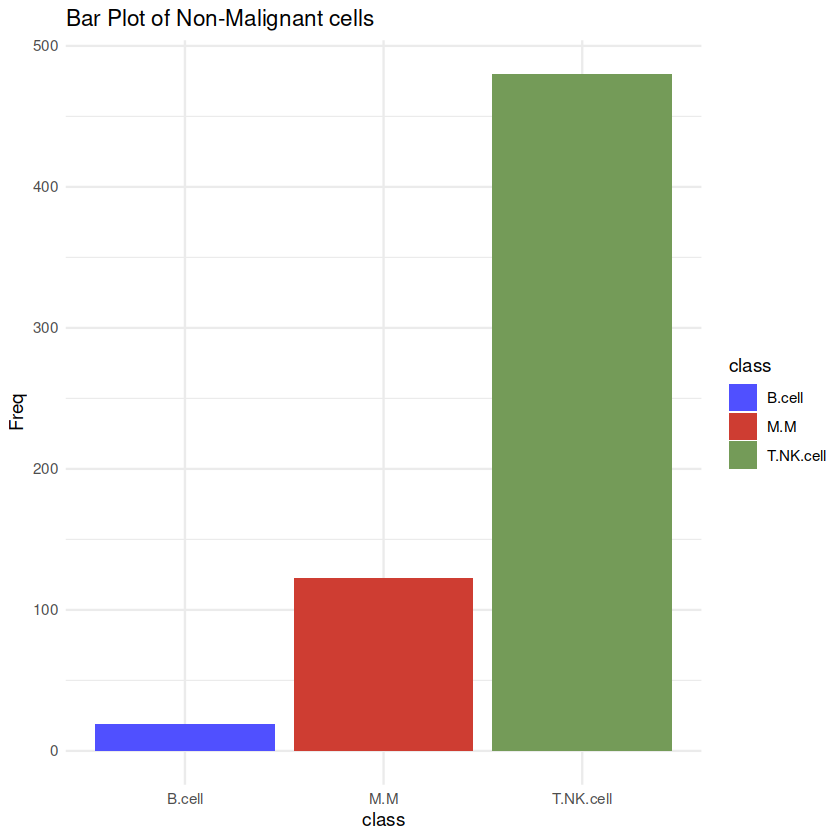

In [167]:
ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

In [168]:
## For sample SCAF2229
SCAF2229 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2229/alternate/SCAF2229_cell_cycle_regress_difference_out.rds")
SCAF2229_new <- RunUMAP(SCAF2229, dims = 1:20)
#DimPlot(SCAF2229_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2229_labels <- SCAF2229_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2229_counts <- table(SCAF2229_labels)

20:56:15 UMAP embedding parameters a = 0.9922 b = 1.112

20:56:15 Read 1422 rows and found 20 numeric columns

20:56:15 Using Annoy for neighbor search, n_neighbors = 30

20:56:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:56:16 Writing NN index file to temp file /lscratch/8034172/RtmpTf1lN7/file3faac825eea24a

20:56:16 Searching Annoy index using 1 thread, search_k = 3000

20:56:16 Annoy recall = 100%

20:56:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:56:17 Initializing from normalized Laplacian + noise (using RSpectra)

20:56:17 Commencing optimization for 500 epochs, with 57616 positive edges

20:56:19 Optimization finished



In [169]:
SCAF2229_counts
SCAF2229_df <- data.frame(SCAF2229_counts)
SCAF2229_df2 <- SCAF2229_df ## this dataframe is for malignant vs Non-malignant
## mark the cell/cluster as malignant vs non-malignant as send by Parth
SCAF2229_df2$SCAF2229_labels <- ifelse(SCAF2229_df2$SCAF2229_labels %in% c(0,1,2,3,4,5,6), "malignant", "non-malignant")
## Plot all the cells count
Fig1 <- ggplot(SCAF2229_df2, aes(x = SCAF2229_labels, y = Freq, fill = SCAF2229_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")
### Dr. thomas like the proprtion in separate bar plot
SCAF2229_df2_new <- SCAF2229_df %>%
  mutate(class = ifelse(as.vector(SCAF2229_labels) %in% c(0,1,2,3,4,5,6), "malignant", "non-malignant"))
dt2 <- SCAF2229_df2_new%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
Fig2 <- ggplot(dt2, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot")

SCAF2229_labels
  0   1   2   3   4   5   6   7   8   9  10 
425 242 187 189 137  52  52  55  41  32  10 

In [170]:
### For other cell types, this time has to exclude the malignant cells and make bar plot for non-malignant one
non_malignant <- SCAF2229_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  T.NK.cell = 8,
  M.M = 10,
  CAF = 7,
  Endothelial = 9
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2229_labels %in% label_values] <- class_name
}

# Skip labels malignant one
non_malignant <- non_malignant[!(non_malignant$SCAF2229_labels %in% c(0,1,2,3,4,5,6)), ]

# Print the updated dataframe
#print(non_malignant)

## group the updated dataframe for plot
dt3 <- non_malignant%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
## Plot the result
Fig3 <- ggplot(dt3, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Non-Malignant cells")
## PLotting the result
png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF2229.jpg", width = 5000, height = 1000, res=300)
ggarrange(Fig1, Fig2, Fig3,
          labels = c("A", "B", "C"),
          ncol = 3, nrow = 1)
dev.off()

png 
  2

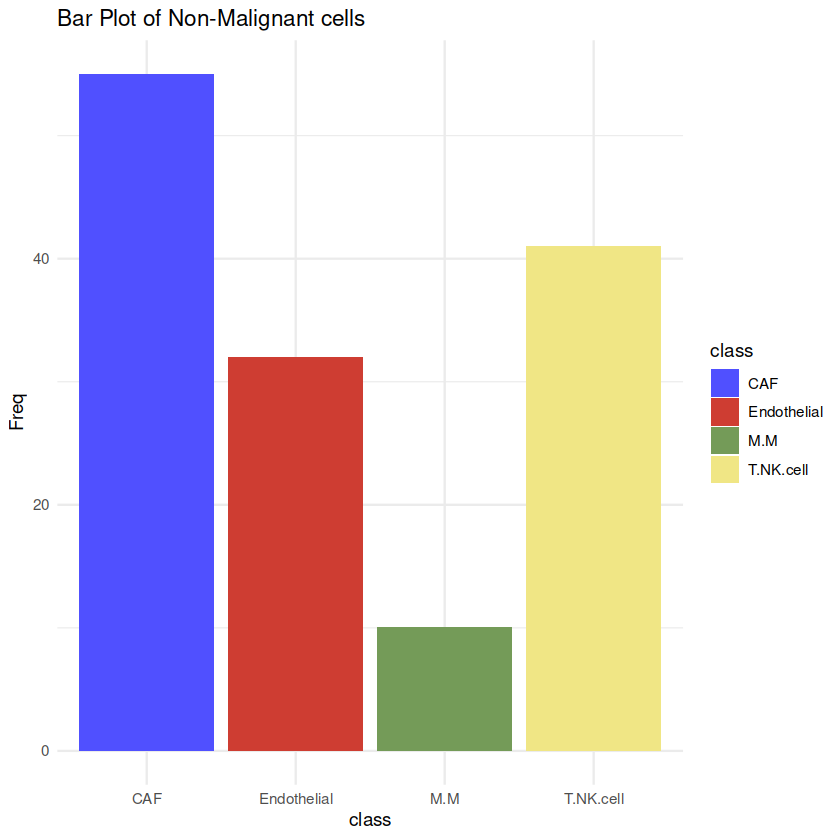

In [171]:
ggplot(non_malignant, aes(x = class, y = Freq, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Bar Plot of Non-Malignant cells")

In [71]:
non_malignant

,SCAF2229_labels,Freq,class
,<fct>,<int>,<chr>
8,7,55,CAF
9,8,41,T.NK.cell
10,9,32,Endothelial
11,10,10,M.M


In [72]:
## For sample SCAF2037
SCAF2037 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2037/alternate_cell_cycle_regress_out/SCAF2037_cell_cycle_regress_difference_out_resolution_1.rds")
SCAF2037_new <- RunUMAP(SCAF2037, dims = 1:20)
#DimPlot(SCAF2037_new, reduction = "umap", label = TRUE)
# Get the cluster labels
SCAF2037_labels <- SCAF2037_new$seurat_clusters
# Count the number of cells in each cluster
SCAF2037_counts <- table(SCAF2037_labels)

10:54:22 UMAP embedding parameters a = 0.9922 b = 1.112

10:54:22 Read 258 rows and found 20 numeric columns

10:54:22 Using Annoy for neighbor search, n_neighbors = 30

10:54:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:54:22 Writing NN index file to temp file /lscratch/8015607/RtmpMQX4Et/file3f41a34a98ff33

10:54:22 Searching Annoy index using 1 thread, search_k = 3000

10:54:22 Annoy recall = 100%

10:54:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:54:23 Initializing from normalized Laplacian + noise (using RSpectra)

10:54:23 Commencing optimization for 500 epochs, with 9614 positive edges

10:54:24 Optimization finished



In [73]:
SCAF2037_counts
SCAF2037_df <- data.frame(SCAF2037_counts)
SCAF2037_df2 <- SCAF2037_df ## this dataframe is for malignant vs Non-malignant
## mark the cell/cluster as malignant vs non-malignant as send by Parth
SCAF2037_df2$SCAF2037_labels <- ifelse(SCAF2037_df2$SCAF2037_labels %in% c(4), "malignant", "non-malignant")
## Plot all the cells count
Fig1 <- ggplot(SCAF2037_df2, aes(x = SCAF2037_labels, y = Freq, fill = SCAF2037_labels)) + 
  geom_col() + theme(axis.text = element_text(face="bold")) + scale_fill_igv() + theme_minimal()+ labs(title = "Count of all cells")
### Dr. thomas like the proprtion in separate bar plot
SCAF2037_df2_new <- SCAF2037_df %>%
  mutate(class = ifelse(as.vector(SCAF2037_labels) %in% c(4), "malignant", "non-malignant"))
dt2 <- SCAF2037_df2_new%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
Fig2 <- ggplot(dt2, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot")

SCAF2037_labels
 0  1  2  3  4 
92 80 40 22 24 

In [75]:
### For other cell types, this time has to exclude the malignant cells and make bar plot for non-malignant one
non_malignant <- SCAF2037_df
non_malignant$class <- NA  # Initialize the "class" column

# Define the conditions for assigning classes
conditions <- list(
  T.NK.cell = 1,
  NK.cell = 0,
  B.cell = 2
)

# Loop through the conditions and assign classes
for (class_name in names(conditions)) {
  label_values <- conditions[[class_name]]
  non_malignant$class[non_malignant$SCAF2037_labels %in% label_values] <- class_name
}

# Skip labels malignant one
non_malignant <- non_malignant[!(non_malignant$SCAF2037_labels %in% c(4)), ]

# Print the updated dataframe
#print(non_malignant)

## group the updated dataframe for plot
dt3 <- non_malignant%>%
  dplyr::group_by(class)%>%
  dplyr::tally()%>%
  dplyr::mutate(percent=n/sum(n))
## Plot the result
Fig3 <- ggplot(dt3, aes(x = class, y = percent, fill = class))+
  geom_col() + scale_fill_igv() + theme_minimal()+ labs(title = "Percentage Bar Plot of Non-Malignant cells")
## PLotting the result
png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF2037.jpg", width = 5000, height = 1000, res=300)
ggarrange(Fig1, Fig2, Fig3,
          labels = c("A", "B", "C"),
          ncol = 3, nrow = 1)
dev.off()

png 
  2

In [115]:
#### Module score for all the datasets for NAPY downstream targete genes ####
SCAF2326 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2326/alternate_cell_cycle_regress_out/SCAF2326_cell_cycle_regress_difference_out_resolution_1.rds")
#SCAF2326[[]] # to see what is insode the stored.rds object, all metadata before NAPY genes

In [108]:
SCAF2497 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2497/alternate_cell_cycle_regress_out/SCAF2497_cell_cycle_regress_difference_out_resolution_1.rds")

In [100]:
SCAF2229 <- readRDS("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/SCAF2229/alternate/SCAF2229_cell_cycle_regress_difference_out.rds")

In [91]:
SCAF2225 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2225/alternate_cell_cycle_regress_out/SCAF2225_cell_cycle_regress_difference_out_resolution_1.rds")

In [58]:
SCAF2037 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2037/alternate_cell_cycle_regress_out/SCAF2037_cell_cycle_regress_difference_out_resolution_1.rds")

In [ ]:
### New sampe starts from here september 15 samples 

In [15]:
SCAF2997 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF2997/alternate_cell_cycle_regress_out/SCAF2997_cell_cycle_regress_difference_out_resolution_1.rds")

In [63]:
SCAF1815 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1815/alternate_cell_cycle_regress_out/SCAF1815_cell_cycle_regress_difference_out_resolution_1.rds")

In [33]:
SCAF1816 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1816/alternate_cell_cycle_regress_out/SCAF1816_cell_cycle_regress_difference_out_resolution_1.rds")

In [42]:
SCAF1817 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1817/alternate_cell_cycle_regress_out/SCAF1817_cell_cycle_regress_difference_out_resolution_1.rds")

In [51]:
SCAF1818 <- readRDS("/data/kumarr9/scRNA/atac.scRNA.parth/SCAF1818/alternate_cell_cycle_regress_out/SCAF1818_cell_cycle_regress_difference_out_resolution_1.rds")

In [64]:
## NAPY target genes
# Define gene list 
ASCL1 <- c("CNKSR3","AACS","GRP","SCNN1A","MS4A8","BRI3BP","CERS4","WNT11","TFCP2L1","BSPRY","CLDN3","FAM3B","FAM84A",
           "CAMK1D","SCN3A","RGL3","KIAA1211L","DLL3","RTBDN","ICA1","KDF1","ST14","CXXC4","PTPRN2","NKX2-1","FBLN7",
           "ELF3","SCIN","KIF1A","SH3BP4","TIMELESS","NARF","RIMKLA","ADD2","SPINT1","FIGNL1","AP1M2","CBFA2T2",
           "RGS17","RAB3B","DDC","CDH1","C11orf63","CACNA1A","EPOR","PAX9","INPPL1","ANO9","CA8","TFF3","MAP7",
           "CANT1","BSN","TLDC1","LFNG","CLDN7","SPTB","CELSR3","CDKN2D","CDC25B","KLK12","SLC39A4","PAK4","UQCC2",
           "ARHGEF16","SMPD3","NOXA1","KCNH6","SEC11C","ATP2A3","CBX8","CEP72","GSE1","KCNC1","GINS2","CALCA",
           "SPPL2B","FARP2","NOL4","CCDC40","NUP210","MYH14","SPAG5","KIAA0319","PCSK2","SFN","RNF183","SLC37A1",
           "RGS12","KRT7","NELL1","PCDHB1","TRIP13","SMIM22","SOX1","LYPD1","BCAT2","LRP11","SRRM3","MAPK13","ST18",
           "KLK14","SHROOM3","SNCAIP","LRRIQ4","PLXNA2","PRR15L","FOXJ1","TOX","DPYSL3","KLC3","TMEM181","PPM1N",
           "GNG4","HSF1","SYT13","SHISA2","SMOC2","KCNH2","CDC42BPG","AKAP1","STX3","WDR17","EXTL3","SLC35D3","STK32A","VAV2",
           "C1orf116","NR0B2","RUNDC3A","WFDC2","DPP3","RUNDC1","COTL1","RAD23A","CLGN","SLC36A4","TMEM184A","FAM84B","SLC7A11",
           "SYP","HOOK1","ABLIM2","CALCB","TMEM30B","C11orf52","SESTD1","PTP4A3","IGFBP2","KRTAP12-3","CRIP2","IGFBP5","HOXD9",
           "ETS2","USP41","TCERG1L","NCAM1","DCPS","BEST3","FEN1","KCNK3","RIPPLY3","EXD3","L1CAM","NCALD","SYT4","SLC25A19",
           "KCNK16","FAM155A","ZMAT4","SH3YL1","NNT","PROM1","HS3ST6","STXBP2","CCDC43","PAH","PEX5L","GFI1","CPD","EEF1D",
           "HIST1H1E","KRTAP10-7","RNF213","INHBB","TRPT1","HOXB5","PCDHA1","FOXA2","BEX1","SCN2A","TSPEAR","MYT1","SCGN",
           "MOV10L1","VWDE","FOXA1","CHMP4C","SCG2","C1orf127","KRTAP10-8","SYDE2","MTHFD2","H2AFX","TRIM68","UCHL1","ZNF488",
           "KRTAP10-6","RGS7","VEGFB","SLC38A1","SDK2","UTP3","HABP2","DBH","KCTD16","RET","SCN9A","PLS1","LMO3","PRUNE2",
           "NPTX1","RASSF6","NUDC","ACOT7","CCDC47","GCH1","ISL1","GAD2","SYT1","SLITRK6","B3GNT5","USH1C","GOLM1","NDUFB9",
           "KRTAP5-5","OR51H1","TENM3","SPTSSA","JAG1","NRAP","RNF186","OR51F2","C10orf113","C12orf42","ATP6V1C2","THSD1",
           "NR0B1","UBE2QL1","OR51T1","GCNT1","OR51A7","WWC1","VLDLR","ALCAM","OR51S1","OR51F1","MRPL20","LRRFIP1","FKBP9",
           "LGSN","CPE","OR51G2","OR51A4","LIMCH1","NKAIN2","RGS4","OR51A2","TTC39C")
NEURDO1 <- c("CERKL","NEUROD4","CHRNA3","SSTR2","CNTN2","NHLH1","THSD7B","EYA2","CHRNB4","PPP1R17","NKAIN1","C16orf59",
           "NHLH2","ZFHX2","PRDM8","LMO1","ASIC1","NEUROG2","SLC17A6","SHD","STON2","CACNG5","KIAA1211","GNG8","GRM2",
           "CACNA2D2","PAX4","CHRNA5","ATP2B3","IGFBPL1","SEMA6A","TFAP2C","SYT6","NEUROG1","SYNGR4","FSTL4","PROKR1",
           "EPHB2","ANKS1B","NEUROD2","PGF","MDGA1","C1QL1","FNDC5","RNF112","NTN3","FSD1","CCDC136","HUNK","PRPH",
           "SHF","ERC2","GABRA5","MSI1","PCDH8","FRMD3","ZDHHC22","DACH1","EBF3","TP73","LIG1","SIX3","SLC7A14",
           "RSPH14","TCP10L","ATP1A3","LIPE","L1CAM","CCDC175","C16orf92","SLC35F3","GPR19","ECE2","BEGAIN","SHOX2",
           "OPTC","CITED1","RUNX1T1","OPRK1","CLDN11","LRFN5","SCAMP5","POPDC3","FEV","IQCD","HRH3","KCNJ3","GAS2",
           "NEUROG3","CADPS","SLC17A7","ZCCHC18","AKT3","CALB2","MRAP2","STMN4","COL2A1","EMX2","GKAP1","NMNAT2",
           "FAM71C","SCN1B","ADCYAP1","MFAP4","SBK2","BTBD17","INSRR","NACAD","PTX3","UBASH3B","RPTN","FOXD4L5",
           "G6PC2","SGCD","SLC22A17","FHOD3","PNMA2","APLP1","DCX","ATCAY","KCNK17","RELN","RFPL2","ILDR2","NPS",
           "MID1","SLCO4C1","DMRTA1","HOXA6","CBLN1","FABP7","SALL1","PAK3","AHSP","KCNT1","CRYBG3","GYPC","PLCL2",
           "GRIK2","HEPACAM2","EEF1A2","NRP2","OR9K2","LMOD1","ARSG","HTR1A","FGFR3","TMSB4Y","DNAJB7")
POU2F3 <- c("BTNL2","RGS21","GRIN2B","C11orf53","ZNF385D","MDGA2","MMP20","ADAMTS19","BRINP3","GFI1B","FAM169B",
            "GUCY2F","PQLC2L","RGS13","ELFN2","GRM5","LIPK","HES2","VTCN1","LRP1B","TPO","KRT38","C12orf74","STOML3",
            "TDRD12","ACSM2A","SPRR2A","CT83","GSDMC","EQTN","LBP","TMEM40","ELF5","CYP24A1","DCHS2","XCR1",
            "C1orf167","TFAP2B","STAP1","DNAH12","UGT1A6","GBP6","MS4A15","CYP4Z1","ALDH3B2","TNS4","ISM2","SRL",
            "AFM","ALOX15","CALML5","PTPRT","LGALS9B","IL1RL2","CYP4B1","INHBC","LGR6","CST1","ADIPOQ","TULP1",
            "CYP4A11","HCK","DYRK4","CD200R1L","FAM83B","PKP1","SMC1B","KRT16","KCTD1","CD22","KCNN3","PDLIM4",
            "RBBP8NL","BNIPL","KRT6B","IL22RA1","GAS7","LGALS7B","TNFSF15","ART3","GGT6","TBX19","GHRH","COL4A6",
            "HS3ST3B1","DSC3","TMPRSS13","PIK3C2B","HOXA1","ITGB6","GALNT6","SERTAD4","ANXA3","FOXI2","HIST3H3",
            "OR2AT4","TRPM4","CA13","SMPDL3B","CDH3","BMP5","TMEM241","SCNN1G","MTMR8","PLA2G2A","EHF","FOXI1",
            "HAPLN1","COL21A1","SEMA3D","MUC1","OOEP","KCNK5","BBOX1","HBB")
YAP1 <- c("ITGB5","LATS2","CYBRD1","WWTR1","PDGFRA","EHD2","TINAGL1","REST","RBPMS","LAMB2","SHROOM4","PLA2R1","DLC1",
          "PRSS23","GPX8","FZD4","TNS1","PTPN14","LRRC32","OSMR","SYNPO","MICA","EMILIN1","IGFBP7","IL1R1","CRIM1",
          "STARD13","SASH1","CDH11","DAB2","MSRB3","ARHGAP31","GGT5","A2M","DCN","DDR2","PDGFRB","ADAMTS1","CDC42EP1",
          "MYLK","SHE","HTRA1","AXL","EMP1","ZCCHC24","WTIP","FBLN5","THBS1","LTBP1","NID1","LIMS2","IGFBP4","ITGA5",
          "PEAR1","TLR3","PLD1","TGFBR2","MMP2","MRC2","PMP22","TEK","EPHA2","PODN","COL8A1","PALMD","SYNPO2","PTPRB",
          "MYOF","KDR","SHC1","PLXDC2","KIF1C","MYL9","CDH5","CARD6","TFPI","TRIM6","COPZ2","IL4R","DTX4","TNFRSF10B",
          "FBN1","EFEMP2","ARID5A","LAMB1","PCOLCE","HMCN1","CAV1","ENG","GUCY1A3","LDB2","OLFML1","ITGA1","RBMS2",
          "ACVRL1","CTGF","FAM198B","TAGLN","ROBO4","FSTL1","CD93","CCND1","TGFBI","CYR61","AJUBA","ABCA9","HEG1",
          "RRAS","C1R","EGFL7","CAV2","LRP1","CX3CL1","CTSH","FGD5","WISP1","CYP1B1","PPIC","FAP","EDNRA","OAF",
          "STAB1","SRPX2","NPAS2","SAMD4A","MGP","NT5E","CLEC14A","RASGRP3","ABCA8","LPP","ITGAV","TNS2","NOTCH2",
          "CCDC80","ACTA2","ZFP36L1","PDE3A","RNASE4","SNX33","CXorf36","COL12A1","TIMP1","PRRX1","SEC16B","FLT4",
          "RHOC","RAB3IL1","PAPSS2","EPAS1","DOCK6","LAMA2","C1S","BGN","MMP14","ARID5B","GLMP","ACOT9","PPFIBP1",
          "ISLR","ECSCR","CNN2","KIAA1217","SLC2A10","NOTCH3","SPRY1","LMOD1","RARG","NOTCH4","C12orf60","FKBP10",
          "RAB32","IFITM3","PLS3","LYVE1","NEDD9","ESAM","PDGFC","SCARF1","CALD1","THBS2","HTRA3","MPZL2","CD109",
          "SPARC","STEAP2","COL5A2","XAF1","OLFML2B","CXCL16","NNMT","CFH","ARHGEF17","SERPINF1","ARHGAP18","NOS3",
          "TNFRSF1A","RNF217","KCNJ8","FBLN2","RAB31","SERPING1","MFGE8","PROS1","FAM114A1","INHBA","LTBP2","COL6A3",
          "TMEM63A","SPATS2L","SLC40A1","STEAP1","FAM26E","TBX2","LDLRAD2","COL5A1","LAMA4","C1QTNF5","TPM2","MEF2C",
          "COL4A2","AHR","CRTAP","NDRG2","KLHL5","ITGA2","F2R","CD34","AHNAK","BMP1","PLK2","ECM1","CSF1R","NRP1",
          "TNS3","SPRED1","CSPG4","BCL9L","GSN","ZYX","PLAT","OLFML3","ANPEP","FN1","ZBTB47","DKK3","RIPK2","FNDC3B",
          "IFIT3","AOC3","MSR1","WWC2","CPED1","STAMBPL1","SMAD3","SP100","PARVA","EPHA1","CST3","PLTP","CFI","NR2F2",
          "HAS2","FNDC4","LOX","FBXO17","S100A16","ABCC9","SULF1","GEM","AMOTL2","GALK1","COL27A1","MRVI1","ACTG2",
          "SRPX","FOLH1","FAS","EPB41L2","BDH2","S100A10","C11orf96","COL6A1","ADAMTS2","BMP4","FAT4","HSPG2","SMAD6",
          "RARRES2","C1RL","FGFRL1","UTRN","PTH1R","FMO4","COL18A1","SUCLG2","SNAI2","GJA1","CD59","LUM","ANTXR1",
          "NPR1","RHBDF1","TGM2","LBH","TRIM8","ALDH1A3","SERPINH1","ANG","RASL12","CNN1","UNC5C","CHSY3","CD248",
          "MRGPRF","CBR4","ZNF469","FMOD","HNMT","GPX3","GUCY1B3","ENPEP","DHRS3","FERMT2","SAT1","TNFSF10","CCL2",
          "IGFBP3","VIM","ERGIC1","EFEMP1","ITGB4","AQP1","MXRA5","VGLL3","HGF","CLEC3B","TBC1D8B","PTGIS","ANXA1",
          "GAS1","VCL","B4GALT1","IL1RL2","NES","MMP11","SLCO2B1","AEBP1","CHP1","CD163","RNASE1","ST6GALNAC6",
          "PLAU","SLC19A1","VCAM1","NPC2","ERBB2","SHISA4","COL4A1","TMEM47","FLT1","COL6A2","UGDH","KIF13A","CD81",
          "TMEM45A","GATA6","ITIH5","ITGBL1","FMO2","DECR1","ADAMTSL3","MYH11","ALDH2","COL3A1","APOL3","IL13RA1",
          "GABRE","ADORA3","COL15A1","ARSJ","COL5A3","NOTCH2NL","RAI14","CTSC","ZDHHC3","COL14A1","SEMA3C","CTSA",
          "ATXN1","NTF4","IDH1","DAGLB","YBX3","CTSO","C7","COL1A1","PHACTR2","TPM1","CD9","SEC31A","KCNE3","EXOSC7",
          "C8orf4","BACE2","QKI","PHLDB2","TMEM26","DUSP6","FEZ1","PDGFB","PRNP","TNFAIP6","INMT","SERPINE1","MTUS1",
          "F13A1","CCDC102B","CLK4","PLBD1","ASAP3","DCAF6","DLD","SNTB1","P3H2","HGSNAT","AGRN","S100A11","TJP1",
          "SYNE1","SLC7A8","LGALS1","TPBG","BHLHE40","GJB2","LRP5","RBMS1","MAT2B","IFITM2","LGALS3","VWF","PBLD",
          "C3","SLC9B2","RSPO3","PYGL","IFIT1","PDE2A","APOE","CLDN1","BAG3","CDH6","STEAP4","H2AFJ","PPM1K","ALDH1L1","KANK1",
          "MERTK","TMEM214","C1QC","TNFRSF21","SARM1","SUSD2","F3","SDC2","IFITM1","ID3","ZEB2","ZNF311","ARF4","RND3","IGF1",
          "SQSTM1","HES1","COBLL1","CTSB","LAP3","CTSL","SERPINB6","LAMP2","KDELR2","SPARCL1","MRC1","CD44","FSTL3","TACSTD2",
          "CTNNB1","CREG1","SFRP2","SURF4","CAT","FOXF1","CD74","CTSZ","TMEM200A","MS4A6A","SPRY2","IFIH1","GHITM","DSEL",
          "C8orf48","TM4SF1","C1QTNF1","GBP3","ZNF217","SOCS2","EPDR1","MAF","HDLBP","LPAR6","SLC27A2","QARS","RRBP1","LY6E",
          "THY1","COL4A3","HSPB8","SLC25A37","TRPC6","KEL","FAM35A","PSAP","PCDH7","COL4A4","CAMK2D","MAMLD1","NR3C2","SNX22",
          "PDZD8","VCAN","ACSS3","NTN4","AC097662.2","PGRMC1","GRINA","CRYAB","HABP2","TBX3","ITM2B","SLC2A13","TRPS1","FOXF2",
          "ME1","ANXA2","FGFR2","CXCL14","EGFR","TEC","PIEZO2","NAV3","PGR","ARHGAP10","KRT5","HBD","GRIA3","SLPI","CHPT1")

In [53]:
# Calculate module scores for the Seurat object

SCAF1815_obj <- AddModuleScore(object = SCAF1815, 
                                   features = list(ASCL1),
                                   ctrl = 20,
                                   name = "ascl1"
                                   )

SCAF1815_obj <- AddModuleScore(object = SCAF1815_obj, 
                                   features = list(NEURDO1),
                                   ctrl = 20,
                                   name = "neurod1"
                                   )
SCAF1815_obj <- AddModuleScore(object = SCAF1815_obj, 
                                   features = list(POU2F3),
                                   ctrl = 20,
                                   name = "pou2f3"
                                   )
SCAF1815_obj <- AddModuleScore(object = SCAF1815_obj, 
                                   features = list(YAP1),
                                   ctrl = 20,
                                   name = "yap1"
                                   )

# SCAF1815_obj[[]] #to see what inside after adding NAPY downstream targete gene

Warning message:
“The following features are not present in the object: FAM84A, C11orf63, TLDC1, KLK12, SFN, KLK14, FAM84B, KRTAP12-3, PROM1, KRTAP10-7, PCDHA1, FOXA1, KRTAP10-8, RASSF6, GAD2, KRTAP5-5, OR51H1, NRAP, RNF186, OR51F2, OR51T1, OR51S1, OR51F1, OR51G2, OR51A4, OR51A2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: CERKL, NEUROD4, CHRNA3, CNTN2, CHRNB4, NKAIN1, C16orf59, NHLH2, LMO1, NEUROG2, SHD, CACNG5, GNG8, GRM2, PAX4, SEMA6A, TFAP2C, SYT6, NEUROG1, PROKR1, NEUROD2, GABRA5, EBF3, RSPH14, CCDC175, C16orf92, ECE2, SHOX2, OPTC, CITED1, OPRK1, LRFN5, POPDC3, NEUROG3, SLC17A7, EMX2, FAM71C, MFAP4, BTBD17, PTX3, RPTN, G6PC2, NPS, DMRTA1, HOXA6, FABP7, SALL1, AHSP, OR9K2, HTR1A, FGFR3, DNAJB7, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: BTNL2, RGS21, GRIN2B, C11orf53, MMP20, ADAMTS19, BRINP3, GFI1B, FAM169B, GUCY2F, PQLC2L, RGS13, LIPK, VTCN1, LRP1B, TPO, K

In [54]:
SCAF1818_obj[[]]

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,S.Score,G2M.Score,Phase,old.ident,CC.Difference,RNA_snn_res.1,seurat_clusters,pANN_0.25_0.29_44,DF.classifications_0.25_0.29_44,neuro1,non_neuro1,ascl11,neurod11,pou2f31,yap11
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGCAGGGTACA-1,SCLC,406,344,2.4630542,-0.04952639,-0.12204372,G1,SCLC,0.072517334,1,1,0.039007092,Singlet,0.470604140,0.06568874,0.0043948577,-0.026353457,-0.025541612,-0.0091785930
AAAGCAAGTAGTAGTA-1,SCLC,279,239,3.2258065,-0.02662583,-0.08142702,G1,SCLC,0.054801190,0,0,0.003546099,Singlet,0.253340277,0.13242329,0.0051319162,0.040004220,-0.009466264,0.0050368959
AAAGTAGAGAAGGTTT-1,SCLC,290,260,0.3448276,-0.02377923,-0.02585091,G1,SCLC,0.002071678,0,0,0.000000000,Singlet,-0.022268871,0.26688778,0.0746289590,0.008808387,0.086830235,0.0199742546
AAAGTAGGTAGGAGTC-1,SCLC,472,395,4.6610169,-0.05190615,-0.08826730,G1,SCLC,0.036361153,3,3,0.049645390,Singlet,0.144304408,0.23987518,0.0194931814,-0.033102687,0.051000955,0.0376153175
AAAGTAGGTCCGAATT-1,SCLC,287,261,0.6968641,-0.04118954,-0.01638541,G1,SCLC,-0.024804127,3,3,0.000000000,Singlet,-0.151658399,0.30743232,-0.0130225114,-0.040209439,-0.004697053,0.0159963522
AAATGCCCAACGCACC-1,SCLC,546,433,0.3663004,0.11035895,0.09965879,S,SCLC,0.010700164,1,1,0.035460993,Singlet,0.129411884,0.10841167,0.0943245263,-0.019025472,-0.011657019,-0.0101872361
AAATGCCCAGCTCGCA-1,SCLC,333,294,0.3003003,0.03510721,-0.09720322,S,SCLC,0.132310430,2,2,0.014184397,Singlet,0.076402155,-0.07648130,0.1173907361,-0.008863182,-0.013523447,-0.0008615432
AACACGTGTCTAGAGG-1,SCLC,333,296,2.4024024,-0.04785220,-0.12150788,G1,SCLC,0.073655687,3,3,0.014184397,Singlet,0.065780988,-0.08847034,0.0555275327,-0.010902595,-0.027046893,-0.0141810834
AACCATGGTATGCTTG-1,SCLC,357,298,4.2016807,-0.02920831,0.02150845,G2M,SCLC,-0.050716761,0,0,0.014184397,Singlet,0.049338594,0.09082677,0.0324912415,0.012576950,-0.013258591,-0.0244674259


In [55]:
## Getting  module scores for NAPY targets
ascl1_data <- SCAF1818_obj@meta.data$ascl11
cluster_info <- as.numeric(as.character(SCAF1818_obj@meta.data$seurat_clusters))
#cluster_info <- as.numeric(cluster_info)
ascl1_df <- cbind(ascl1_data, cluster_info)
ascl1_df <- as.data.frame(ascl1_df)

neurod11_data <- SCAF1818_obj@meta.data$neurod11
cluster_info2 <- as.numeric(as.character(SCAF1818_obj@meta.data$seurat_clusters))
#cluster_info <- as.numeric(cluster_info)
neurod11_df <- cbind(neurod11_data, cluster_info)
neurod11_df <- as.data.frame(neurod11_df)

pou2f31_data <- SCAF1818_obj@meta.data$pou2f31
cluster_info3 <- as.numeric(as.character(SCAF1818_obj@meta.data$seurat_clusters))
#cluster_info <- as.numeric(cluster_info)
pou2f31_df <- cbind(pou2f31_data, cluster_info)
pou2f31_df <- as.data.frame(pou2f31_df)

yap11_data <- SCAF1818_obj@meta.data$yap11
cluster_info4 <- as.numeric(as.character(SCAF1818_obj@meta.data$seurat_clusters))
#cluster_info <- as.numeric(cluster_info)
yap11_df <- cbind(yap11_data, cluster_info)
yap11_df <- as.data.frame(yap11_df)


In [56]:
Fig1 <- ggplot(ascl1_df, aes(x = factor(cluster_info), y = ascl1_data, fill= factor(cluster_info))) +
  geom_violin() +
  labs(x = "Cluster", y = "Expression") + theme_minimal() + 
  ggtitle("ASCL1 downstream target") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
ASCL1 <- Fig1 + theme(legend.position = "none") ## added to remove the fill label

Fig2 <- ggplot(neurod11_df, aes(x = factor(cluster_info2), y = neurod11_data, fill= factor(cluster_info2))) +
    geom_violin() +
    labs(x = "Cluster", y = "Expression") + theme_minimal() + 
    ggtitle("NEUROD1 downstream targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
NEURDO1 <-  Fig2 + theme(legend.position = "none") ## added to remove the fill label

Fig3 <- ggplot(pou2f31_df, aes(x = factor(cluster_info3), y = pou2f31_data, fill= factor(cluster_info3))) +
    geom_violin() +
    labs(x = "Cluster", y = "Expression") + theme_minimal() + 
    ggtitle("POU2F3 downstream targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
POU2F3 <-  Fig3 + theme(legend.position = "none") ## added to remove the fill label

Fig4 <- ggplot(yap11_df, aes(x = factor(cluster_info4), y = yap11_data, fill= factor(cluster_info4))) +
    geom_violin() +
    labs(x = "Cluster", y = "Expression") + theme_minimal() + 
    ggtitle("YAP1 downstream targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
YAP1 <-  Fig4 + theme(legend.position = "none") ## added to remove the fill label

In [57]:
library("ggpubr")
png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF1818_NAPY.jpg", width = 5000, height = 1000, res=300)
ggarrange(ASCL1, NEURDO1, POU2F3, YAP1,
          ncol = 4, nrow = 1)
dev.off()

png 
  2

In [90]:
#### for Malignant cells only
# SCAF2037, malignant only cluster 4
# yap1_filtered <- yap11_df[yap11_df$cluster_info == 4, ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info == 4, ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info == 4, ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info == 4, ]


In [96]:
### For SCAF2225, malignant clusters are 4, 5
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(4, 5), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(4, 5), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(4, 5), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(4, 5), ]

In [106]:
## FOR SCAF2229, malignant one are 0,1,2,3,4,5,6
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(0,1,2,3,4,5,6), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(0,1,2,3,4,5,6), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(0,1,2,3,4,5,6), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(0,1,2,3,4,5,6), ]

In [113]:
## FOR SCAF2497, malignant one are 0,1,2,3,4,5,7,8,10,15,17,18
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(0,1,2,3,4,5,7,8,10,15,17,18), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(0,1,2,3,4,5,7,8,10,15,17,18), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(0,1,2,3,4,5,7,8,10,15,17,18), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(0,1,2,3,4,5,7,8,10,15,17,18), ]

In [120]:
## FOR SCAF2326, malignant one are 0,6,8
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(0,6,8), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(0,6,8), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(0,6,8), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(0,6,8), ]

In [22]:
## FOR SCAF2997, malignant one are 0
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(0), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(0), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(0), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(0), ]

In [31]:
## FOR SCAF1815, malignant one are 0
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(0,2), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(0,2), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(0,2), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(0,2), ]

In [40]:
## FOR SCAF1816, malignant one are 0
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(1,2), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(1,2), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(1,2), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(1,2), ]

In [49]:
## FOR SCAF1817, malignant one are 0
yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(1,2,5,6), ]
pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(1,2,5,6), ]
neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(1,2,5,6), ]
ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(1,2,5,6), ]

In [ ]:
## FOR SCAF1818, malignant one are 0
# yap1_filtered <- yap11_df[yap11_df$cluster_info %in% c(1,2,5,6), ]
# pou2f3_filtered <- pou2f31_df[pou2f31_df$cluster_info %in% c(1,2,5,6), ]
# neurod1_filtered <- neurod11_df[neurod11_df$cluster_info %in% c(1,2,5,6), ]
# ascl1_filtered <- ascl1_df[ascl1_df$cluster_info %in% c(1,2,5,6), ]

In [50]:
Fig1 <- ggplot(ascl1_filtered, aes(x = factor(cluster_info), y = ascl1_data, fill= factor(cluster_info))) +
  geom_violin() +
  labs(x = "Cluster", y = "Expression") + theme_minimal() + 
  ggtitle("ASCL1 targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
ASCL1 <- Fig1 + theme(legend.position = "none") ## added to remove the fill label

Fig2 <- ggplot(neurod1_filtered, aes(x = factor(cluster_info), y = neurod11_data, fill= factor(cluster_info))) +
    geom_violin() +
    labs(x = "Cluster", y = "Expression") + theme_minimal() + 
    ggtitle("NEUROD1 targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
NEURDO1 <-  Fig2 + theme(legend.position = "none") ## added to remove the fill label

Fig3 <- ggplot(pou2f3_filtered, aes(x = factor(cluster_info), y = pou2f31_data, fill= factor(cluster_info))) +
    geom_violin() +
    labs(x = "Cluster", y = "Expression") + theme_minimal() + 
    ggtitle("POU2F3 targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
POU2F3 <-  Fig3 + theme(legend.position = "none") ## added to remove the fill label

Fig4 <- ggplot(yap1_filtered, aes(x = factor(cluster_info), y = yap11_data, fill= factor(cluster_info))) +
    geom_violin() +
    labs(x = "Cluster", y = "Expression") + theme_minimal() + 
    ggtitle("YAP1 targets") + geom_hline(yintercept=0.00, linetype="dashed", color = "red")
YAP1 <-  Fig4 + theme(legend.position = "none") ## added to remove the fill label

png("/data/kumarr9/scRNA/atac.scRNA.parth/cell_count/SCAF1817_NAPY_malignant_only.jpg", width = 3000, height = 1000, res=300)
ggarrange(ASCL1, NEURDO1, POU2F3, YAP1,
          ncol = 4, nrow = 1)
dev.off()

png 
  2

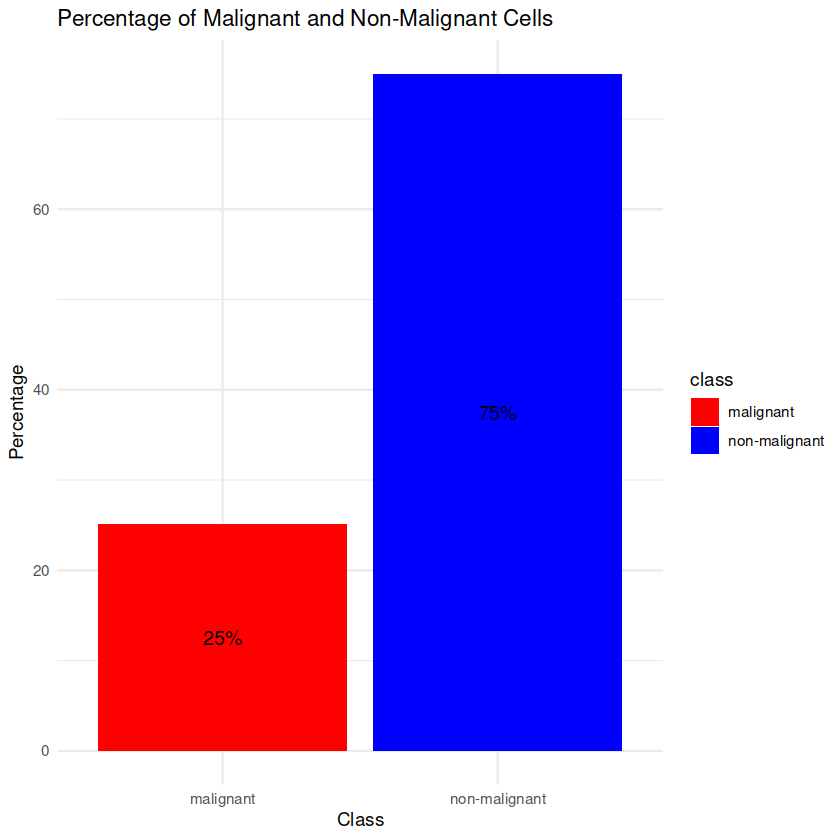

In [152]:
# Load the necessary libraries if not already loaded
library(dplyr)
library(ggplot2)

# Create your dataframe
df <- data.frame(
  SCAF2326_labels = 0:16,
  Freq = c(289, 288, 216, 217, 181, 174, 174, 124, 105, 98, 75, 66, 83, 66, 44, 50, 19)
)

# Label the rows as "malignant" or "non-malignant"
df <- df %>%
  mutate(class = ifelse(SCAF2326_labels %in% c(0, 6, 8), "malignant", "non-malignant"))

# Calculate the total frequency for each class
total_malignant <- sum(df$Freq[df$class == "malignant"])
total_non_malignant <- sum(df$Freq[df$class == "non-malignant"])

# Calculate the percentage of malignant and non-malignant cells
percentage_malignant <- (total_malignant / sum(df$Freq)) * 100
percentage_non_malignant <- (total_non_malignant / sum(df$Freq)) * 100

# Create a dataframe for plotting
plot_data <- data.frame(
  class = c("malignant", "non-malignant"),
  percentage = c(percentage_malignant, percentage_non_malignant)
)

# Create a bar plot
ggplot(plot_data, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of Malignant and Non-Malignant Cells",
       x = "Class",
       y = "Percentage") +
  scale_fill_manual(values = c("malignant" = "red", "non-malignant" = "blue")) +
  theme_minimal()


In [154]:
df

SCAF2326_labels,Freq,class
<int>,<dbl>,<chr>
0,289,malignant
1,288,non-malignant
2,216,non-malignant
3,217,non-malignant
4,181,non-malignant
5,174,non-malignant
6,174,malignant
7,124,non-malignant
8,105,malignant


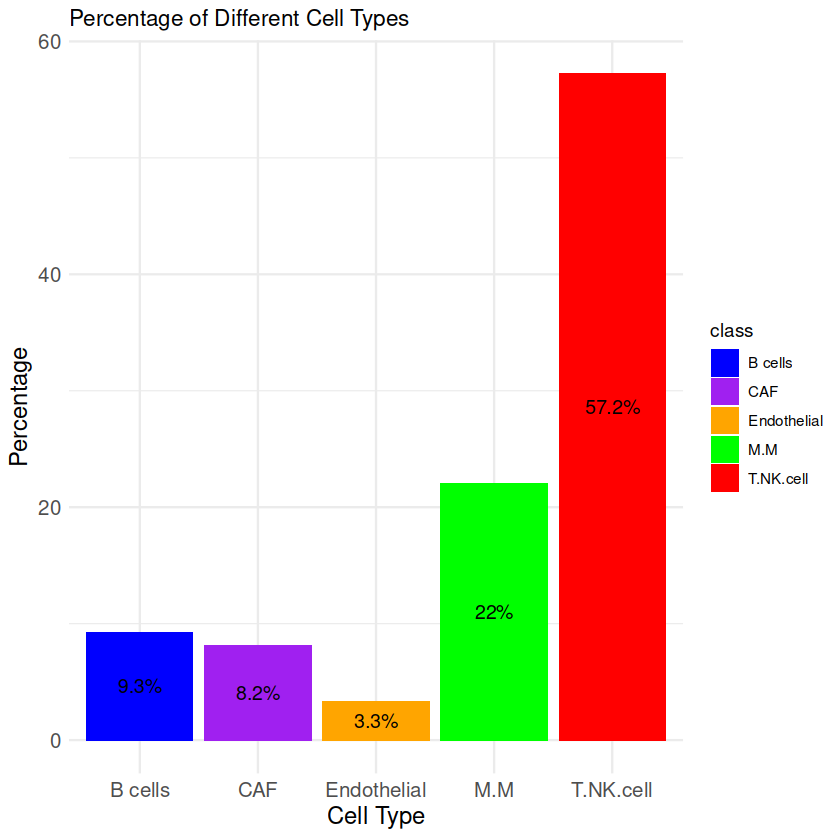

In [157]:
# Load the necessary libraries if not already loaded
library(dplyr)
library(ggplot2)

# Create your dataframe
df <- data.frame(
  SCAF2326_labels = 0:16,
  Freq = c(289, 288, 216, 217, 181, 174, 174, 124, 105, 98, 75, 66, 83, 66, 44, 50, 19)
)

# Define label mappings
label_mapping <- list(
  "T.NK.cell" = c(1, 2, 3, 11, 12),
  "B cells" = c(10, 13),
  "M.M" = c(5, 9, 14, 16),
  "CAF" = 7,
  "Endothelial" = 15
)

# Map labels based on the defined mapping
df$class <- NA
for (label in names(label_mapping)) {
  df$class[df$SCAF2326_labels %in% label_mapping[[label]]] <- label
}

# Remove rows with NA in the class column
df <- df %>%
  drop_na()

# Calculate the total frequency
total_freq <- sum(df$Freq)

# Calculate the percentage of each label group
df <- df %>%
  group_by(class) %>%
  summarise(percentage = sum(Freq) / total_freq * 100)

# Create a bar plot
ggplot(df, aes(x = class, y = percentage, fill = class)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Percentage of Different Cell Types",
       x = "Cell Type",
       y = "Percentage") +
  scale_fill_manual(values = c(
    "T.NK.cell" = "red",
    "B cells" = "blue",
    "M.M" = "green",
    "CAF" = "purple",
    "Endothelial" = "orange"
  )) +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))


In [156]:
df

class,percentage
<chr>,<dbl>
B cells1,4.934211
B cells2,4.342105
CAF,8.157895
Endothelial,3.289474
M.M1,11.447368
M.M2,6.447368
M.M3,2.894737
M.M4,1.250000
T.NK.cell1,18.947368
